# A look at global debt using data from the IMF

## Part 1: Importing data
## Part 2: Interest
### a. Looking at interest payments as a percent of GNI on a country and global level
### b. Looking at global interest payments in 2017
### c. Comparing interst payemnts as % GNI form 1970 to 2017
### d. Looking at the total amount of money spoent on interest payemnts globally and by country, continent, and income grouping
## Part 3: Principal forgiven
### a. Seeing how much principal was forgiven by country and globally
## Part 4: Grace periods
## Part 5: Interest rates



## Part 1: Importing data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
debt= pd.read_csv("IDSData 2.csv")
debt.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 60
28671,Zimbabwe,ZWE,Total reserves in months of imports,FI.RES.TOTL.MO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28672,Zimbabwe,ZWE,"Undisbursed external debt, official creditors ...",DT.UND.OFFT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,244069328.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28673,Zimbabwe,ZWE,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,4656702.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28674,Zimbabwe,ZWE,"Undisbursed external debt, total (UND, current...",DT.UND.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,248726031.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28675,Zimbabwe,ZWE,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,482184792.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
debt.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', 'Unnamed: 60'],
      dtype='object')

In [5]:
debt["Indicator Name"].unique()

array(['Average grace period on new external debt commitments (years)',
       'Average grace period on new external debt commitments, official (years)',
       'Average grace period on new external debt commitments, private (years)',
       'Average grant element on new external debt commitments (%)',
       'Average grant element on new external debt commitments, official (%)',
       'Average grant element on new external debt commitments, private (%)',
       'Average interest on new external debt commitments (%)',
       'Average interest on new external debt commitments, official (%)',
       'Average interest on new external debt commitments, private (%)',
       'Average maturity on new external debt commitments (years)',
       'Average maturity on new external debt commitments, official (years)',
       'Average maturity on new external debt commitments, private (years)',
       'Commitments, IBRD (COM, current US$)',
       'Commitments, IDA (COM, current US$)',
       'Comm

## Part 2: Interest


In [7]:
interest= debt.loc[(debt["Indicator Name"]=="Interest payments on external debt (% of GNI)")]
interest.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 60
70,Afghanistan,AFG,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.051076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,Albania,ALB,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.717084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Algeria,DZA,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.213933,0.327445,0.765964,0.795508,1.670979,1.409579,...,0.038003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,Angola,AGO,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.661533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,Armenia,ARM,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.355789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### a. Looking at interest payments as a percent of GNI on a country and global level



In [10]:

interest_df= pd.melt(interest, id_vars=["Country Name", "Country Code","Indicator Code", "Indicator Name"],  var_name="Year", value_name='Interest payments on external debt (% of GNI)')
interest_df.head()

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Interest payments on external debt (% of GNI)
0,Afghanistan,AFG,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,NaN
1,Albania,ALB,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,NaN
2,Algeria,DZA,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,0.213933
3,Angola,AGO,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,NaN
4,Armenia,ARM,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,NaN


In [11]:
interest_df_clean= interest_df.dropna()
interest_df_clean.head()

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Interest payments on external debt (% of GNI)
2,Algeria,DZA,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,0.213933
8,Belize,BLZ,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,0.020972
9,Benin,BEN,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,0.111338
11,Bolivia,BOL,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,1.057251
13,Botswana,BWA,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),1970,0.445705


In [12]:
interest_df_clean["Interest payments on external debt (% of GNI)"].max()

78.9699722568418

In [178]:
interest_df_clean.loc[(interest_df_clean["Interest payments on external debt (% of GNI)"]==78.9699722568418)]

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Interest payments on external debt (% of GNI)
5160,Liberia,LBR,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),2008,78.969972


In [16]:
interest_df_clean.iloc[(interest_df_clean["Interest payments on external debt (% of GNI)"])].max()

Country Name                                                                            Turkey
Country Code                                                                               TUR
Indicator Code                                                               DT.INT.DECT.GN.ZS
Indicator Name                                   Interest payments on external debt (% of GNI)
Year                                                                                      1971
Interest payments on external debt (% of GNI)                                         1.946775
dtype: object

In [14]:
interest_df_clean.loc[(interest_df_clean["Interest payments on external debt (% of GNI)"]==78.9699722568418)]

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Interest payments on external debt (% of GNI)
5160,Liberia,LBR,DT.INT.DECT.GN.ZS,Interest payments on external debt (% of GNI),2008,78.969972


In [17]:
interest_df_clean["Interest payments on external debt (% of GNI)"].mean()

1.587019052426656

In [18]:
interest_clean= interest_df_clean[["Country Name", "Year", "Interest payments on external debt (% of GNI)" ]]

In [19]:
interest_clean.head()

,Country Name,Year,Interest payments on external debt (% of GNI)
2,Algeria,1970,0.213933
8,Belize,1970,0.020972
9,Benin,1970,0.111338
11,Bolivia,1970,1.057251
13,Botswana,1970,0.445705


In [20]:
interest_clean["Country Name"].unique()

array(['Algeria', 'Belize', 'Benin', 'Bolivia', 'Botswana', 'Brazil',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic',
       'Chad', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Dominican Republic',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Eswatini', 'Fiji', 'Gabon',
       'Gambia, The', 'Ghana', 'Guatemala', 'Guyana', 'Honduras', 'India',
       'Indonesia', 'Jamaica', 'Jordan', 'Kenya',
       'Latin America & Caribbean (excluding high income)', 'Lesotho',
       'Liberia', 'Low & middle income', 'Lower middle income',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico',
       'Middle income', 'Morocco', 'Nepal', 'Niger', 'Nigeria',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Philippines', 'Rwanda',
       'Senegal', 'Sierra Leone', 'South Asia', 'Sri Lanka',
       'St. Vincent and the Grenadines',
       'Sub-Saharan Africa

In [49]:
interest_clean.loc[(interest_clean["Year"]=="2017")]["Interest payments on external debt (% of GNI)"].mean()
interest_2017 = interest_clean.loc[(interest_clean["Year"]=="2017")]
interest_2017.head()

,Country Name,Year,Interest payments on external debt (% of GNI)
6298,Afghanistan,2017,0.051076
6299,Albania,2017,0.717084
6300,Algeria,2017,0.038003
6301,Angola,2017,0.661533
6302,Armenia,2017,2.355789


In [60]:
interest_2017_df=interest_2017[["Country Name", "Interest payments on external debt (% of GNI)"]]
interest_2017_df.head()

,Country Name,Interest payments on external debt (% of GNI)
6298,Afghanistan,0.051076
6299,Albania,0.717084
6300,Algeria,0.038003
6301,Angola,0.661533
6302,Armenia,2.355789


In [62]:
'''
country = ['Algeria', 'Belize', 'Benin', 'Bolivia', 'Botswana', 'Brazil',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic',
       'Chad', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Dominican Republic',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Eswatini', 'Fiji', 'Gabon',
       'Gambia, The', 'Ghana', 'Guatemala', 'Guyana', 'Honduras', 'India',
       'Indonesia', 'Jamaica', 'Jordan', 'Kenya',
       'Latin America & Caribbean (excluding high income)', 'Lesotho',
       'Liberia', 'Low & middle income', 'Lower middle income',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico',
       'Middle income', 'Morocco', 'Nepal', 'Niger', 'Nigeria',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Philippines', 'Rwanda',
       'Senegal', 'Sierra Leone', 'South Asia', 'Sri Lanka',
       'St. Vincent and the Grenadines',
       'Sub-Saharan Africa (excluding high income)', 'Sudan', 'Thailand',
       'Togo', 'Tunisia', 'Turkey', 'Uganda', 'Upper middle income',
       'Venezuela, RB', 'Zambia', 'Zimbabwe', 'Bangladesh', 'IDA only',
       'Guinea-Bissau', 'Mauritius', 'Grenada', 'Solomon Islands',
       'Iran, Islamic Rep.', 'Bhutan', 'Bulgaria', 'Cabo Verde', 'China',
       'Dominica', 'Ethiopia', 'St. Lucia', 'Vanuatu', 'Lao PDR',
       'Mozambique', 'Least developed countries: UN classification',
       'Maldives', 'Tonga', 'Guinea', 'Low income',
       'Europe & Central Asia (excluding high income)', 'Tanzania',
       'Angola', 'Lebanon', 'Nicaragua', 'Romania', 'Vietnam',
       'Yemen, Rep.', 'Albania', 'Mongolia', 'Russian Federation',
       'Ukraine', 'Uzbekistan', 'Armenia', 'Belarus', 'Georgia',
       'Kazakhstan', 'Kyrgyz Republic', 'Macedonia, FYR',
       'Middle East & North Africa (excluding high income)', 'Tajikistan',
       'Turkmenistan', 'Azerbaijan', 'South Africa', 'Cambodia',
       'Eritrea', 'Moldova', 'Paraguay', 'Syrian Arab Republic', 'Haiti',
       'Samoa', 'Serbia', 'Bosnia and Herzegovina', 'Myanmar',
       'Sao Tome and Principe', 'Afghanistan', 'Kosovo', 'Montenegro',
       'Timor-Leste', 'Djibouti', 'Somalia']
for item in country:
    x= interest_2017_df.loc[(interest_2017_df["Country Name"]==item)]
    y= interest_2017_df["Interest payments on external debt (% of GNI)"]

plt.bar(x,y)
'''

'\ncountry = [\'Algeria\', \'Belize\', \'Benin\', \'Bolivia\', \'Botswana\', \'Brazil\',\n       \'Burkina Faso\', \'Burundi\', \'Cameroon\', \'Central African Republic\',\n       \'Chad\', \'Colombia\', \'Comoros\', \'Congo, Dem. Rep.\', \'Congo, Rep.\',\n       \'Costa Rica\', "Cote d\'Ivoire", \'Dominican Republic\',\n       \'East Asia & Pacific (excluding high income)\', \'Ecuador\',\n       \'Egypt, Arab Rep.\', \'El Salvador\', \'Eswatini\', \'Fiji\', \'Gabon\',\n       \'Gambia, The\', \'Ghana\', \'Guatemala\', \'Guyana\', \'Honduras\', \'India\',\n       \'Indonesia\', \'Jamaica\', \'Jordan\', \'Kenya\',\n       \'Latin America & Caribbean (excluding high income)\', \'Lesotho\',\n       \'Liberia\', \'Low & middle income\', \'Lower middle income\',\n       \'Madagascar\', \'Malawi\', \'Mali\', \'Mauritania\', \'Mexico\',\n       \'Middle income\', \'Morocco\', \'Nepal\', \'Niger\', \'Nigeria\',\n       \'Pakistan\', \'Papua New Guinea\', \'Peru\', \'Philippines\', \'Rwanda\',\

In [63]:
Zimbabwe= interest_clean.loc[(interest_clean["Country Name"]=="Zimbabwe")]
Zimbabwe.head()

,Country Name,Year,Interest payments on external debt (% of GNI)
133,Zimbabwe,1970,0.246296
267,Zimbabwe,1971,0.263878
401,Zimbabwe,1972,0.220238
535,Zimbabwe,1973,0.170412
669,Zimbabwe,1974,0.127111


In [74]:
Zimbabwe=Zimbabwe.drop(columns= "Country Name")
Zimbabwe=Zimbabwe.set_index("Year")
Zimbabwe.head()

,Interest payments on external debt (% of GNI)
Year,
1970,0.246296
1971,0.263878
1972,0.220238
1973,0.170412
1974,0.127111


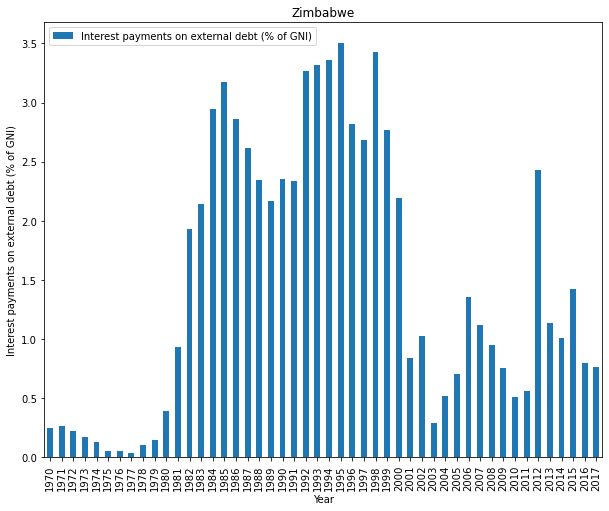

In [75]:
Zimbabwe.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest payments on external debt (% of GNI)")
plt.title("Zimbabwe")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (10,8)
plt.show()

In [69]:
Turkey= interest_clean.loc[(interest_clean["Country Name"]=="Turkey")]
Turkey.head()

,Country Name,Year,Interest payments on external debt (% of GNI)
122,Turkey,1970,0.257804
256,Turkey,1971,0.343310
390,Turkey,1972,0.325347
524,Turkey,1973,0.328776
658,Turkey,1974,0.286570


In [76]:
Turkey=Turkey.drop(columns= "Country Name")
Turkey=Turkey.set_index("Year")
Turkey.head()

,Interest payments on external debt (% of GNI)
Year,
1970,0.257804
1971,0.343310
1972,0.325347
1973,0.328776
1974,0.286570


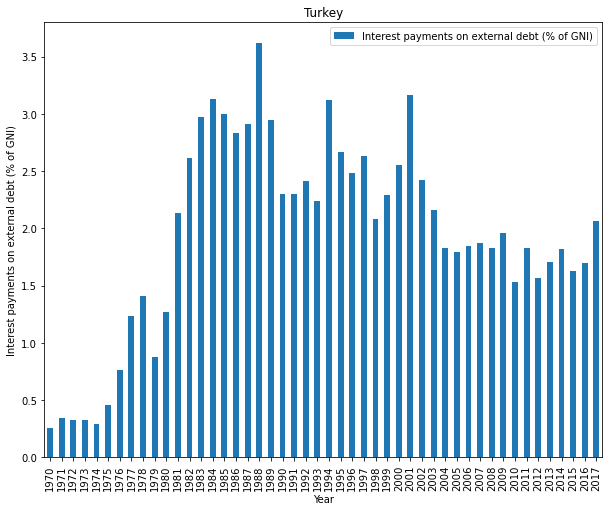

In [77]:
Turkey.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest payments on external debt (% of GNI)")
plt.title("Turkey")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (10,8)
plt.show()

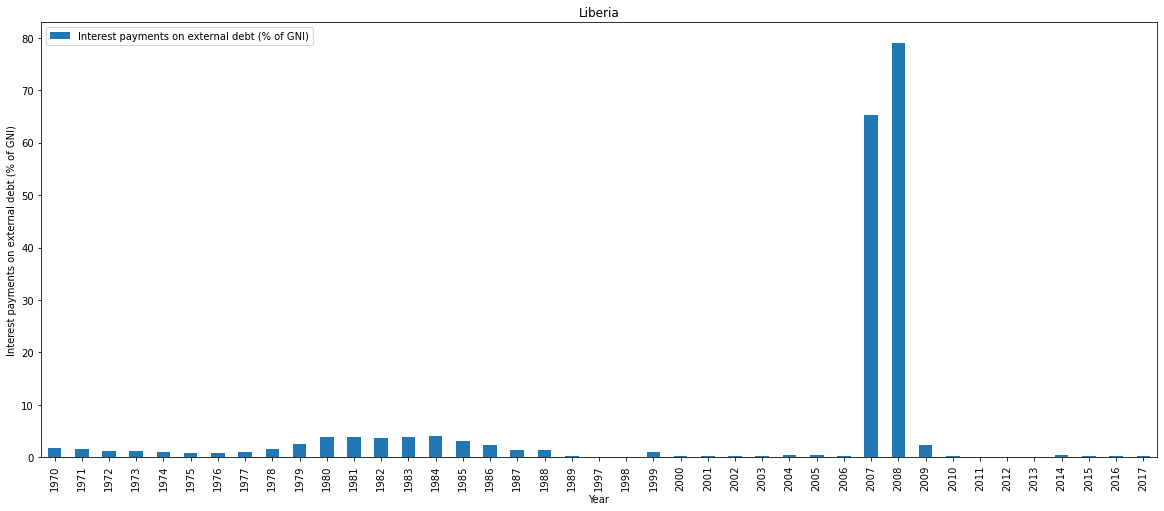

In [181]:
Liberia=  interest_clean.loc[(interest_clean["Country Name"]=="Liberia")]
Liberia=Liberia.drop(columns= "Country Name")
Liberia=Liberia.set_index("Year")

Liberia.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest payments on external debt (% of GNI)")
plt.title("Liberia")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (10,8)
plt.show()

In [78]:
interest_2017_df["Interest payments on external debt (% of GNI)"].max()

9.52067404468592

In [79]:
interest_2017_df.loc[(interest_2017_df["Interest payments on external debt (% of GNI)"]==9.52067404468592)]

,Country Name,Interest payments on external debt (% of GNI)
6381,Mongolia,9.520674


In [80]:
Mongolia= interest_clean.loc[(interest_clean["Country Name"]=="Mongolia")]
Mongolia.head()

,Country Name,Year,Interest payments on external debt (% of GNI)
3031,Mongolia,1992,0.889347
3165,Mongolia,1993,1.446453
3299,Mongolia,1994,1.204296
3433,Mongolia,1995,0.711842
3567,Mongolia,1996,0.660017


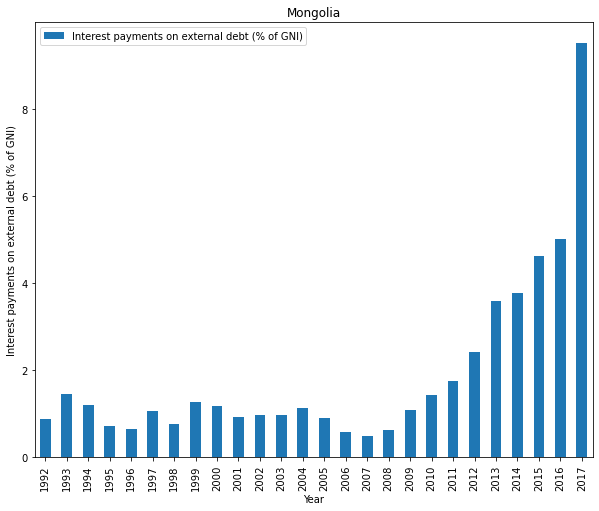

In [81]:
Mongolia=Mongolia.drop(columns= "Country Name")
Mongolia=Mongolia.set_index("Year")

Mongolia.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest payments on external debt (% of GNI)")
plt.title("Mongolia")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (10,8)
plt.show()

## b. Looking at global interest payments in 2017


In [82]:
interest_2017=interest_clean.loc[(interest_clean["Year"]=="2017")]
interest_2017.head()

,Country Name,Year,Interest payments on external debt (% of GNI)
6298,Afghanistan,2017,0.051076
6299,Albania,2017,0.717084
6300,Algeria,2017,0.038003
6301,Angola,2017,0.661533
6302,Armenia,2017,2.355789


In [83]:
interest_2017_2= interest_2017.drop(columns="Year")
interest_2017_2=interest_2017_2.set_index("Country Name")

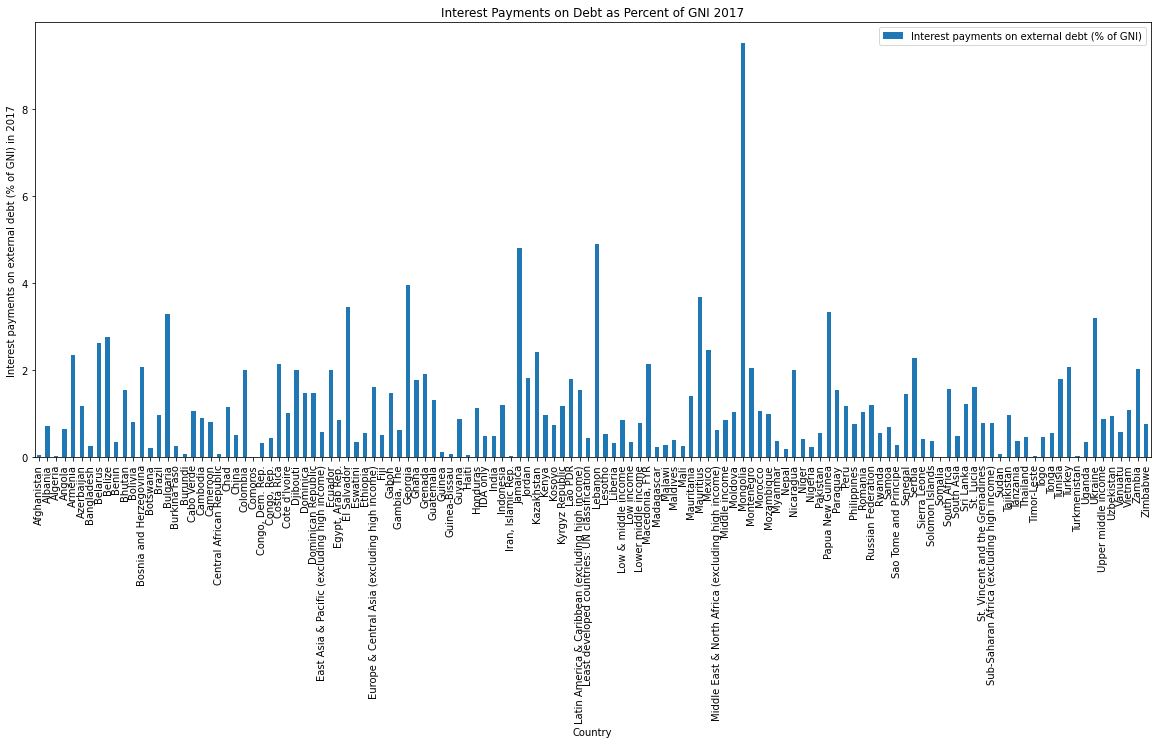

In [93]:
interest_2017_2.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Interest payments on external debt (% of GNI) in 2017")
plt.title("Interest Payments on Debt as Percent of GNI 2017")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show()

In [95]:
x= interest_2017["Country Name"]
y= interest_2017["Interest payments on external debt (% of GNI)"]


/Users/annashomsky/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Albania'),
  Text(2, 0, 'Algeria'),
  Text(3, 0, 'Angola'),
  Text(4, 0, 'Armenia'),
  Text(5, 0, 'Azerbaijan'),
  Text(6, 0, 'Bangladesh'),
  Text(7, 0, 'Belarus'),
  Text(8, 0, 'Belize'),
  Text(9, 0, 'Benin'),
  Text(10, 0

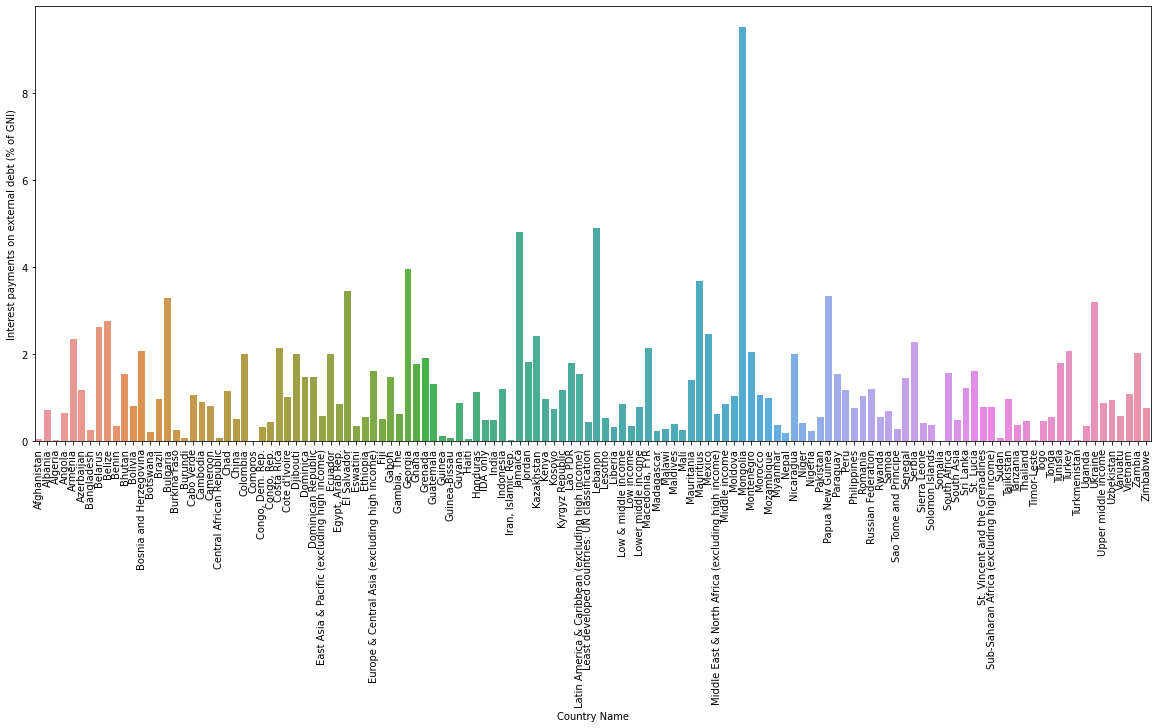

In [97]:
sns.barplot(x,y)
plt.xticks(rotation = 90)

In [99]:
interest_2017_3= interest_2017_2.sort_values("Interest payments on external debt (% of GNI)")

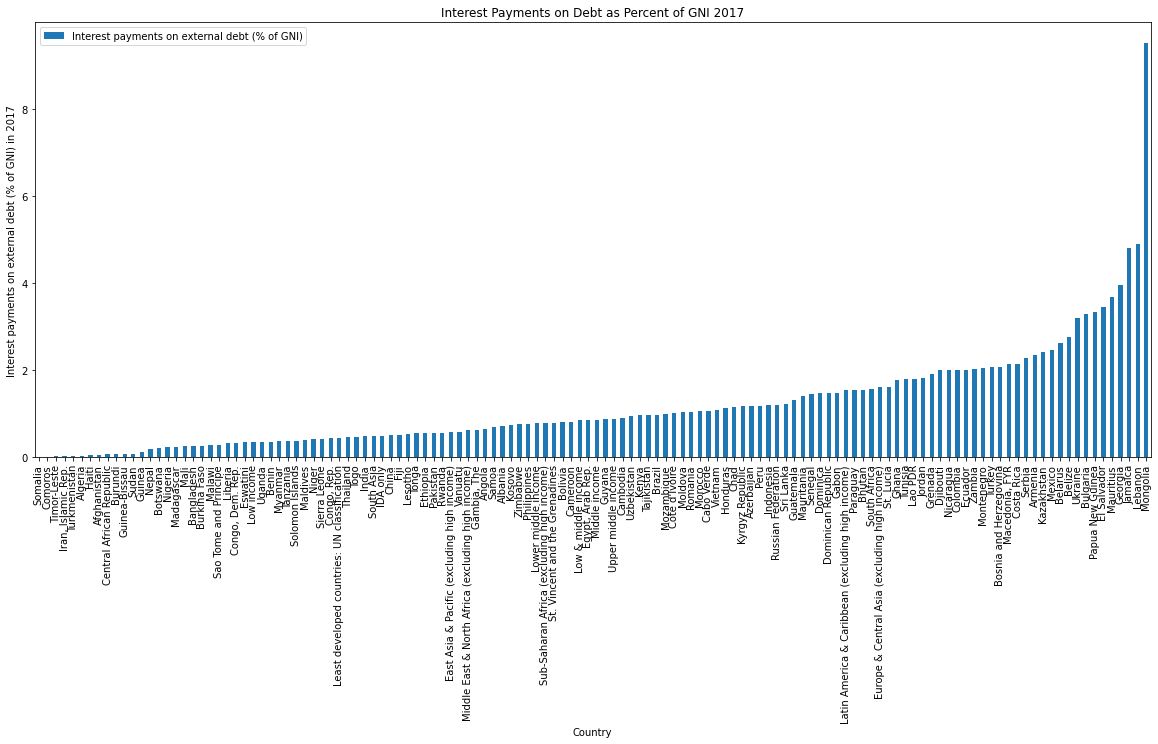

In [100]:
interest_2017_3.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Interest payments on external debt (% of GNI) in 2017")
plt.title("Interest Payments on Debt as Percent of GNI 2017")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show()

## c. Comparing interst payemnts as % GNI form 1970 to 2017


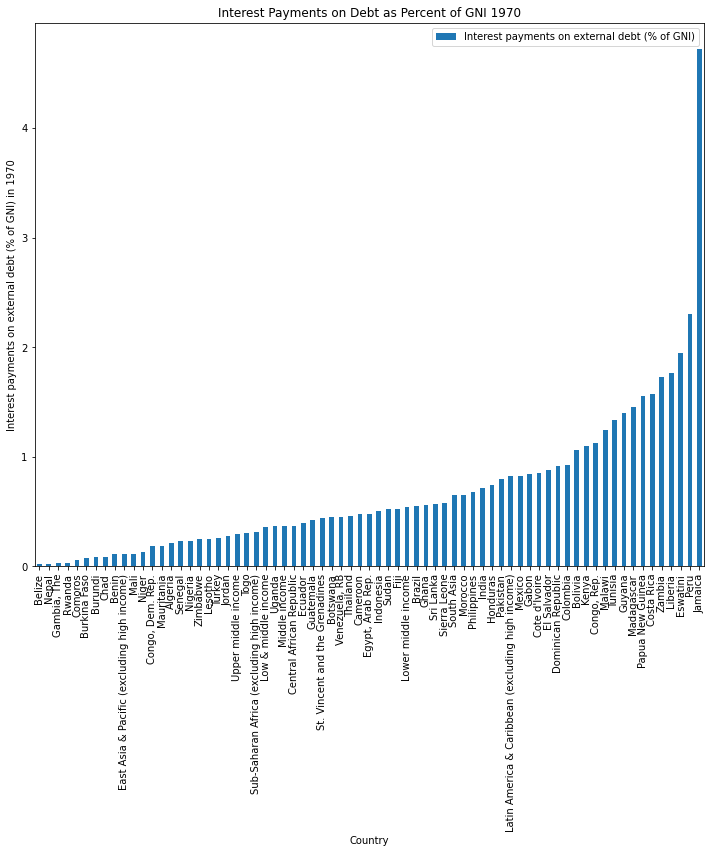

In [106]:
df_seventy= interest_clean.loc[(interest_clean["Year"]=="1970")]
df_seventy= df_seventy.drop(columns="Year")
df_seventy=df_seventy.set_index("Country Name")
df_seventy2= df_seventy.sort_values("Interest payments on external debt (% of GNI)")
df_seventy2.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Interest payments on external debt (% of GNI) in 1970")
plt.title("Interest Payments on Debt as Percent of GNI 1970")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show()


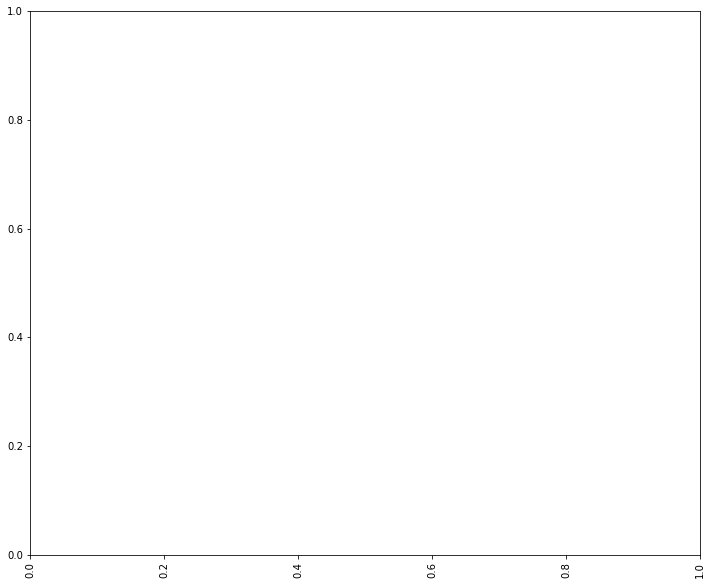

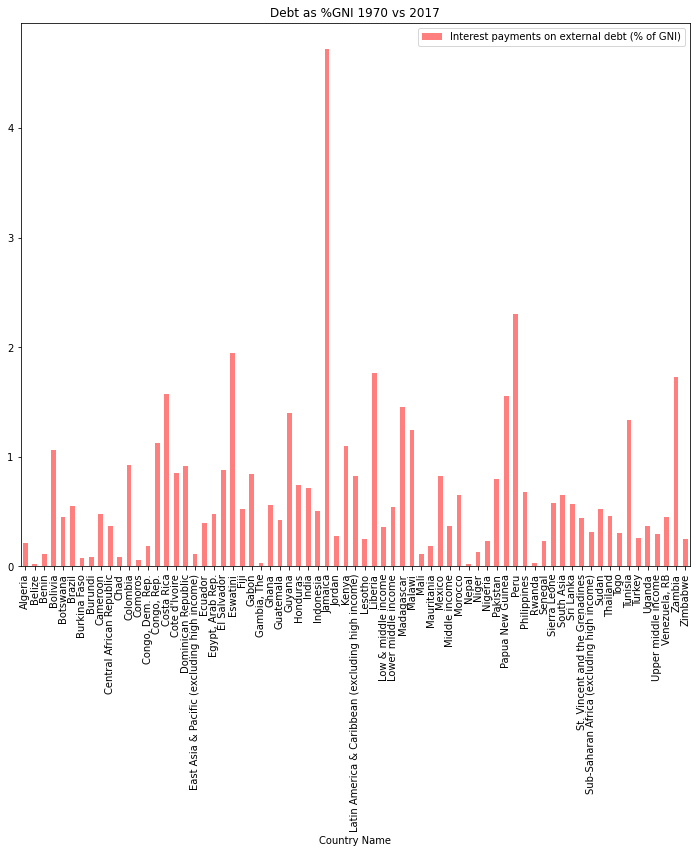

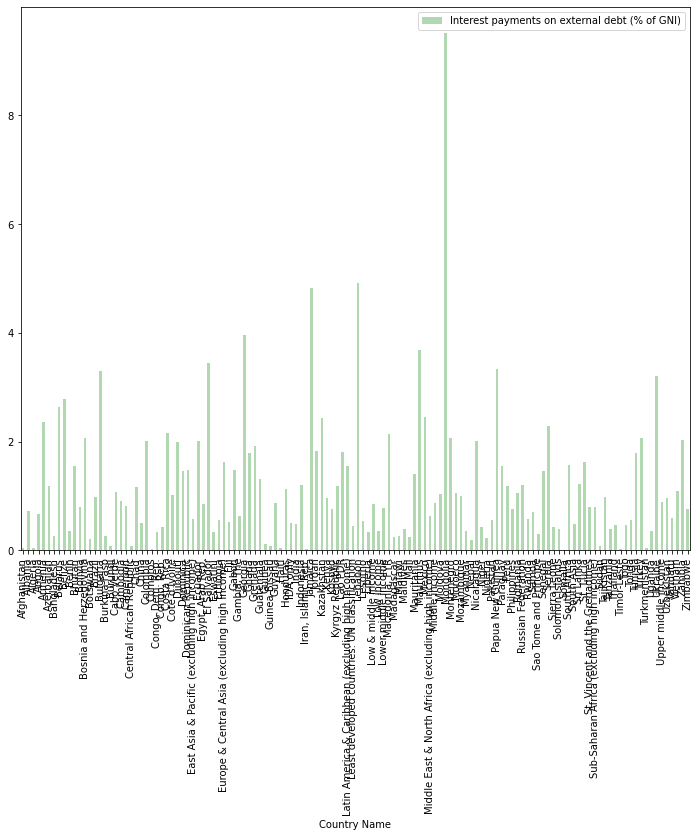

In [120]:
ax = plt.subplots()

plt.xticks(rotation=90)

df_seventy.plot(kind="bar", color= "red", alpha= 0.5, label = "1970")

plt.legend(loc= "upper right")
#ax1.set_ylabel("Country", color="black")
plt.title("Debt as %GNI 1970 vs 2017")
interest_2017_2.plot(kind="bar", color= "green", alpha= 0.3, label = "2017")
plt.rcParams['figure.figsize'] = (12,10)



plt.legend()
plt.show()



In [139]:
interest_2010=interest_clean.loc[(interest_clean["Year"]=="2010")]
interest_2010.count()


Country Name                                     130
Year                                             130
Interest payments on external debt (% of GNI)    130
dtype: int64

In [134]:
interest_2017_2.count()

Interest payments on external debt (% of GNI)    130
dtype: int64

In [151]:
compare_years= interest_clean.loc[(interest_clean["Year"]=="1970") | (interest_clean["Year"]=="2017") ]
compare_years.head()

,Country Name,Year,Interest payments on external debt (% of GNI)
2,Algeria,1970,0.213933
8,Belize,1970,0.020972
9,Benin,1970,0.111338
11,Bolivia,1970,1.057251
13,Botswana,1970,0.445705


In [152]:
compare_years.tail()

,Country Name,Year,Interest payments on external debt (% of GNI)
6425,Uzbekistan,2017,0.958508
6426,Vanuatu,2017,0.591136
6428,Vietnam,2017,1.081998
6430,Zambia,2017,2.029228
6431,Zimbabwe,2017,0.762808


In [156]:
compare_years2= interest_2017_2.merge(df_seventy, left_on = "Country Name", right_on = "Country Name")
compare_years2.head()

,Interest payments on external debt (% of GNI)_x,Interest payments on external debt (% of GNI)_y
Country Name,,
Algeria,0.038003,0.213933
Belize,2.775764,0.020972
Benin,0.360902,0.111338
Bolivia,0.801383,1.057251
Botswana,0.203654,0.445705


In [157]:
compare_years2= compare_years2.rename(columns={"Interest payments on external debt (% of GNI)_x": "2017", "Interest payments on external debt (% of GNI)_y": "1970"})
compare_years2.head()


,2017,1970
Country Name,,
Algeria,0.038003,0.213933
Belize,2.775764,0.020972
Benin,0.360902,0.111338
Bolivia,0.801383,1.057251
Botswana,0.203654,0.445705


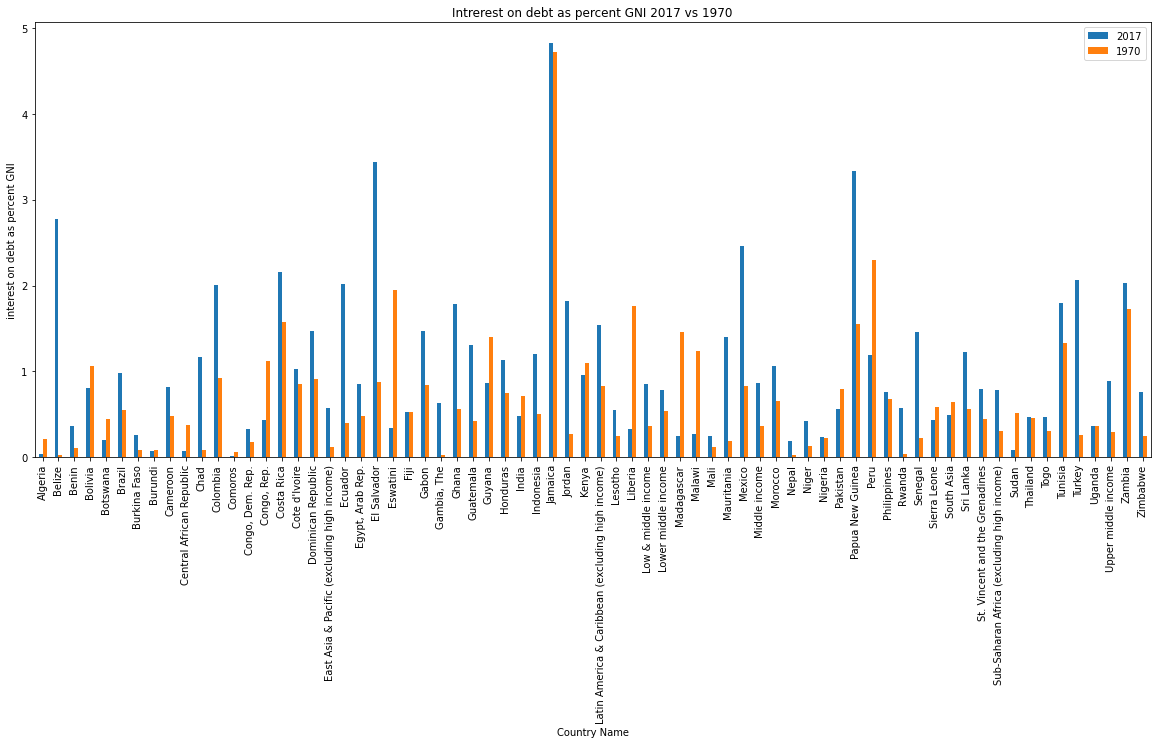

In [164]:
compare_years2.plot(kind= "bar")
plt.ylabel("interest on debt as percent GNI")
plt.title("Intrerest on debt as percent GNI 2017 vs 1970")
plt.rcParams['figure.figsize'] = (20,8)

In [170]:
compare_years4= interest_2017_2.merge(df_seventy, left_on = "Country Name", right_on = "Country Name", how = "outer")
compare_years4= compare_years4.rename(columns={"Interest payments on external debt (% of GNI)_x": "2017", "Interest payments on external debt (% of GNI)_y": "1970"})
compare_years4.head()

,2017,1970
Country Name,,
Afghanistan,0.051076,NaN
Albania,0.717084,NaN
Algeria,0.038003,0.213933
Angola,0.661533,NaN
Armenia,2.355789,NaN


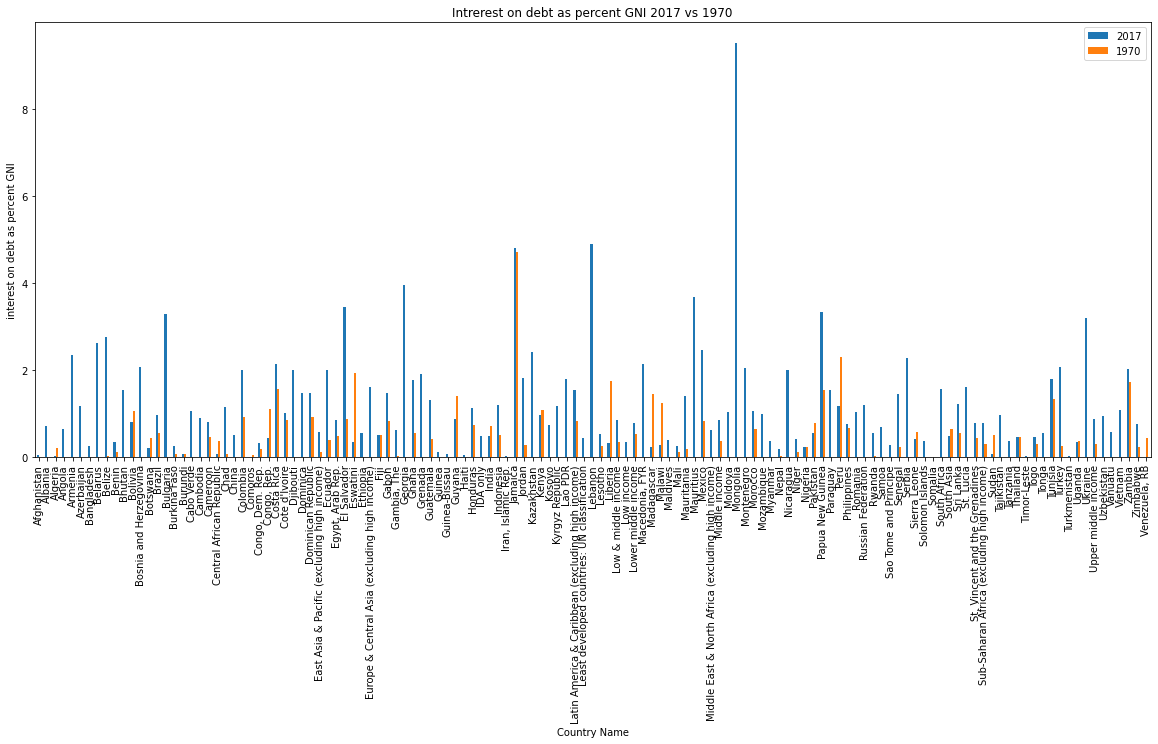

In [171]:
compare_years4.plot(kind= "bar")
plt.ylabel("interest on debt as percent GNI")
plt.title("Intrerest on debt as percent GNI 2017 vs 1970")
plt.rcParams['figure.figsize'] = (20,8)

In [174]:
compare_years5= interest_2017_3.merge(df_seventy, left_on = "Country Name", right_on = "Country Name", how = "outer")
compare_years5= compare_years5.rename(columns={"Interest payments on external debt (% of GNI)_x": "2017", "Interest payments on external debt (% of GNI)_y": "1970"})
compare_years5.head()

,2017,1970
Country Name,,
Somalia,0.000691,NaN
Comoros,0.015871,0.060825
Timor-Leste,0.019834,NaN
"Iran, Islamic Rep.",0.021121,NaN
Turkmenistan,0.035583,NaN


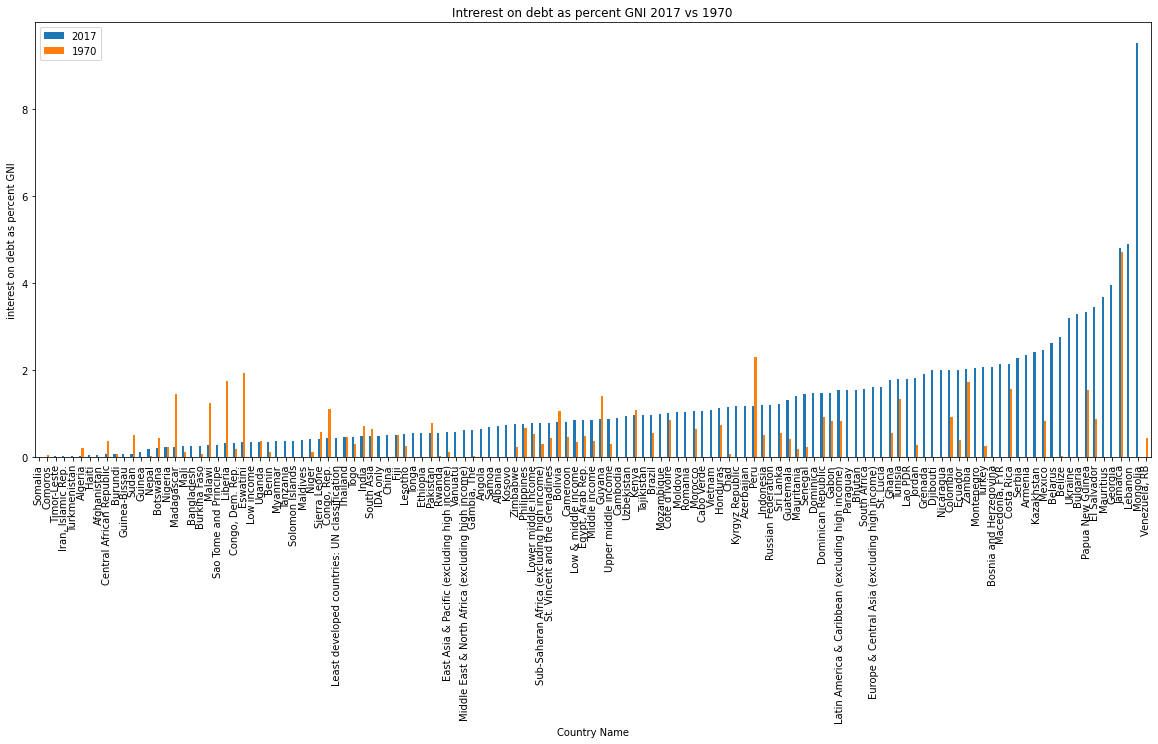

In [175]:
compare_years5.plot(kind= "bar")
plt.ylabel("interest on debt as percent GNI")
plt.title("Intrerest on debt as percent GNI 2017 vs 1970")
plt.rcParams['figure.figsize'] = (20,8)

## d. Looking at the total amount of money spent on interest payemnts globally and by country, continent, and income grouping

In [177]:
total_interest = debt.loc[(debt["Indicator Name"])== "Interest payments on external debt, total (INT, current US$)"]
total_interest.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 60
75,Afghanistan,AFG,"Interest payments on external debt, total (INT...",DT.INT.DECT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,10734635.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,Albania,ALB,"Interest payments on external debt, total (INT...",DT.INT.DECT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,94245899.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,Algeria,DZA,"Interest payments on external debt, total (INT...",DT.INT.DECT.CD,10144602.6,16491809.8,51621988.3,68726578.4,219532463.8,216803065.4,...,63795145.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,Angola,AGO,"Interest payments on external debt, total (INT...",DT.INT.DECT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,779241365.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,Armenia,ARM,"Interest payments on external debt, total (INT...",DT.INT.DECT.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,283501935.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:

total_interest_df= pd.melt(total_interest, id_vars=["Country Name", "Country Code","Indicator Code", "Indicator Name"],  var_name="Year", value_name='Interest payments on external debt, total (INT, current US$)')
total_interest_df.head()

,Country Name,Country Code,Indicator Code,Indicator Name,Year,"Interest payments on external debt, total (INT, current US$)"
0,Afghanistan,AFG,DT.INT.DECT.CD,"Interest payments on external debt, total (INT...",1970,0.0
1,Albania,ALB,DT.INT.DECT.CD,"Interest payments on external debt, total (INT...",1970,0.0
2,Algeria,DZA,DT.INT.DECT.CD,"Interest payments on external debt, total (INT...",1970,10144602.6
3,Angola,AGO,DT.INT.DECT.CD,"Interest payments on external debt, total (INT...",1970,0.0
4,Armenia,ARM,DT.INT.DECT.CD,"Interest payments on external debt, total (INT...",1970,0.0


In [184]:


interest_total_clean= total_interest_df[["Country Name", "Year", "Interest payments on external debt, total (INT, current US$)" ]]
interest_total_clean=interest_total_clean.dropna()
interest_total_clean.head()

,Country Name,Year,"Interest payments on external debt, total (INT, current US$)"
0,Afghanistan,1970,0.0
1,Albania,1970,0.0
2,Algeria,1970,10144602.6
3,Angola,1970,0.0
4,Armenia,1970,0.0


In [185]:
interest_total_clean["Interest payments on external debt, total (INT, current US$)"].max()

240626462023.0

In [186]:
interest_total_clean.loc[(interest_total_clean["Interest payments on external debt, total (INT, current US$)"]==240626462023.0)]


,Country Name,Year,"Interest payments on external debt, total (INT, current US$)"
6367,Low & middle income,2017,2.406265e+11


In [187]:
low_and_mid_income= interest_total_clean.loc[(interest_total_clean["Country Name"]=="Low & middle income")]
low_and_mid_income.tail()

,Country Name,Year,"Interest payments on external debt, total (INT, current US$)"
5831,Low & middle income,2013,1.896145e+11
5965,Low & middle income,2014,1.991554e+11
6099,Low & middle income,2015,2.038062e+11
6233,Low & middle income,2016,2.038486e+11
6367,Low & middle income,2017,2.406265e+11


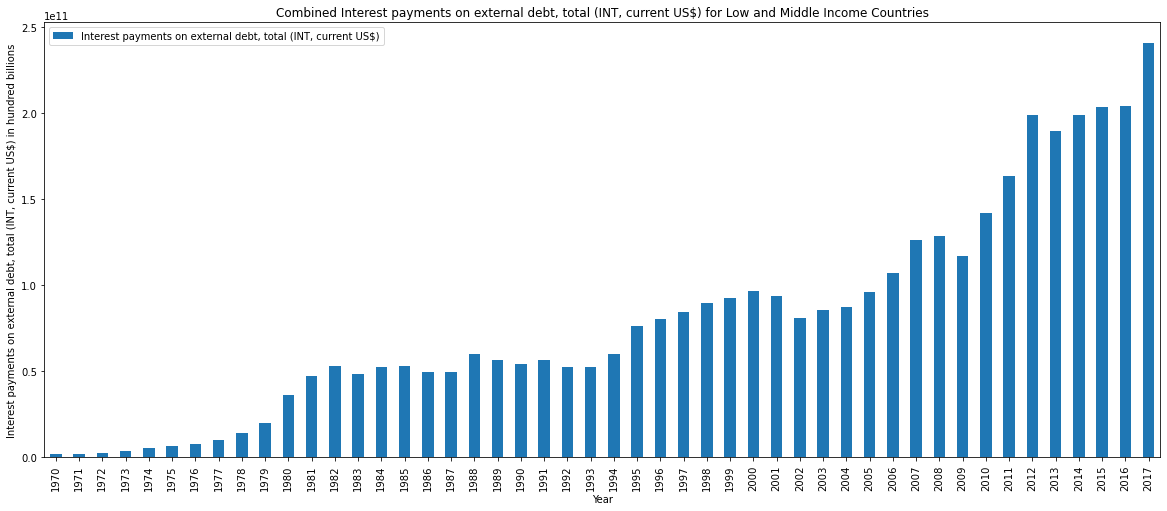

In [191]:
low_and_mid_income_for_graph= low_and_mid_income[["Year","Interest payments on external debt, total (INT, current US$)" ]]
low_and_mid_income_for_graph= low_and_mid_income_for_graph.set_index("Year")
low_and_mid_income_for_graph.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest payments on external debt, total (INT, current US$) in hundred billions")
plt.title("Combined Interest payments on external debt, total (INT, current US$) for Low and Middle Income Countries")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show()




# 250 billion dollars was paid by low and midle income countries in interest on loans in 2017

In [203]:
interest_totl_2017= interest_total_clean.loc[(interest_total_clean["Year"]=="2017")]
interest_totl_20172=interest_totl_2017.sort_values("Interest payments on external debt, total (INT, current US$)")
interest_totl_20172= interest_totl_20172.drop(columns=("Year"))
interest_totl_20172=interest_totl_20172.set_index("Country Name")
interest_totl_20172.head()

,"Interest payments on external debt, total (INT, current US$)"
Country Name,
Somalia,50668.5
Comoros,103933.7
Syrian Arab Republic,206624.0
Timor-Leste,514547.0
Guinea-Bissau,1085570.1


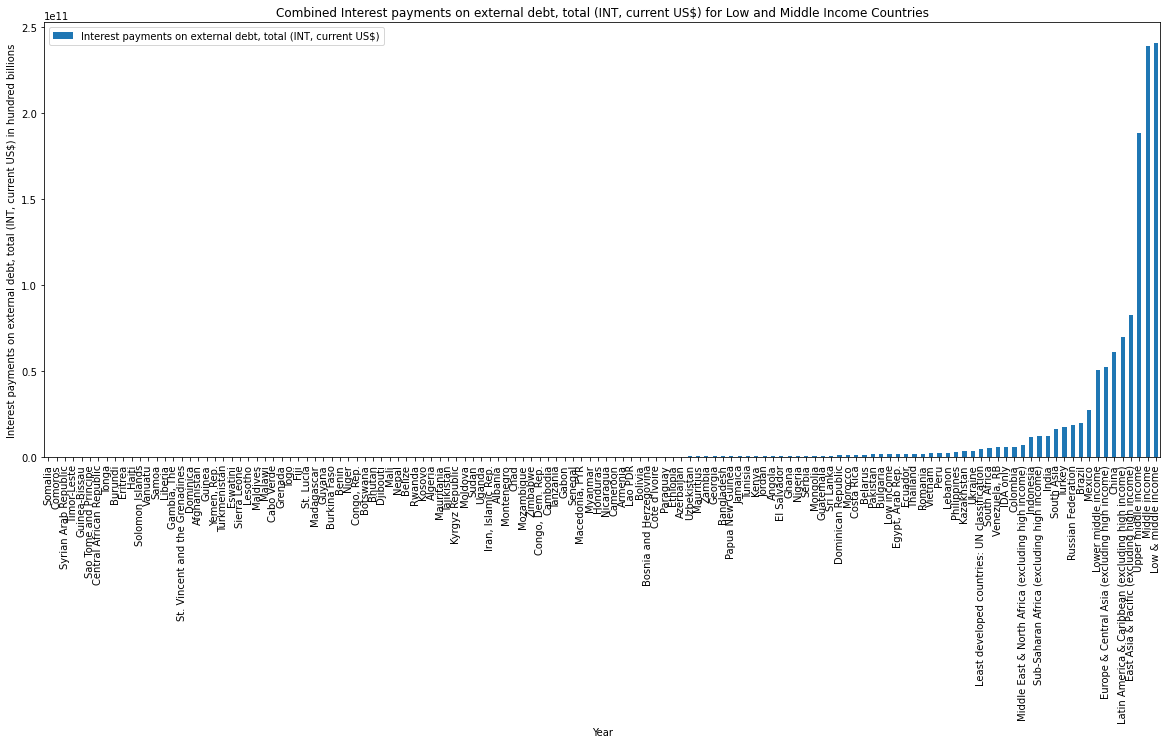

In [204]:
interest_totl_20172.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest payments on external debt, total (INT, current US$) in hundred billions")
plt.title("Combined Interest payments on external debt, total (INT, current US$) for Low and Middle Income Countries")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show()

In [216]:
interest_totl_2017_just_countries= interest_totl_2017.loc[(interest_totl_2017["Country Name"]!= "IDA Only" )& (interest_totl_2017["Country Name"]!=  "Lower middle income") &(interest_totl_2017["Country Name"]!= "Europe & Central Asia (excluding high income)")& (interest_totl_2017["Country Name"]!= "Latin America & Caribbean (excluding high income)") & (interest_totl_2017["Country Name"]!= "East Asia & Pacific (excluding high income)") & (interest_totl_2017["Country Name"]!= "Upper middle income") & (interest_totl_2017["Country Name"]!= "Middle income") & (interest_totl_2017["Country Name"]!= "Low & middle income") & (interest_totl_2017["Country Name"]!= "Upper middle income") & (interest_totl_2017["Country Name"]!="Least developed countries: UN classification") & (interest_totl_2017["Country Name"]!=  "Middle East & North Africa (excluding high income)") & (interest_totl_2017["Country Name"]!="Sub-Saharan Africa (excluding high income)")]
                                                           
                                                         
                                                           

In [217]:
interest_totl_2017_just_countries= interest_totl_2017_just_countries.set_index("Country Name")

In [218]:
interest_totl_2017_just_countries= interest_totl_2017_just_countries.sort_values("Interest payments on external debt, total (INT, current US$)")



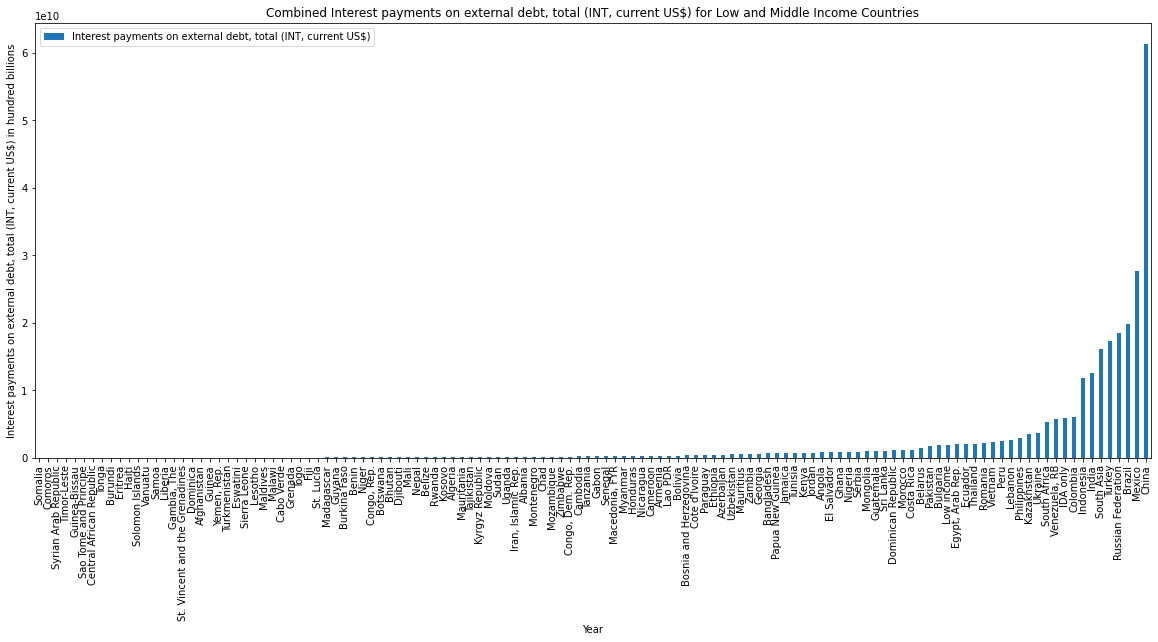

In [219]:

interest_totl_2017_just_countries.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest payments on external debt, total (INT, current US$) in hundred billions")
plt.title("Combined Interest payments on external debt, total (INT, current US$) for Low and Middle Income Countries")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

In [215]:
interest_totl_2017_just_countries.tail(20)

,Year,"Interest payments on external debt, total (INT, current US$)"
Country Name,,
Peru,2017,2.414917e+09
Lebanon,2017,2.549207e+09
Philippines,2017,2.885157e+09
Kazakhstan,2017,3.437122e+09
Ukraine,2017,3.697406e+09
Least developed countries: UN classification,2017,4.623506e+09
South Africa,2017,5.285605e+09
"Venezuela, RB",2017,5.800024e+09
IDA only,2017,5.848957e+09


In [220]:
areas_2017=interest_totl_2017.loc[(interest_totl_2017["Country Name"]== "IDA Only" )| (interest_totl_2017["Country Name"]==  "Lower middle income") |(interest_totl_2017["Country Name"]== "Europe & Central Asia (excluding high income)")| (interest_totl_2017["Country Name"]== "Latin America & Caribbean (excluding high income)") | (interest_totl_2017["Country Name"]== "East Asia & Pacific (excluding high income)") | (interest_totl_2017["Country Name"]== "Upper middle income") | (interest_totl_2017["Country Name"]== "Middle income") | (interest_totl_2017["Country Name"]== "Low & middle income") | (interest_totl_2017["Country Name"]== "Upper middle income") | (interest_totl_2017["Country Name"]=="Least developed countries: UN classification") | (interest_totl_2017["Country Name"]==  "Middle East & North Africa (excluding high income)") | (interest_totl_2017["Country Name"]=="Sub-Saharan Africa (excluding high income)")]
areas_2017                                                          
  

,Country Name,Year,"Interest payments on external debt, total (INT, current US$)"
6331,East Asia & Pacific (excluding high income),2017,8.281996e+10
6338,Europe & Central Asia (excluding high income),2017,5.225175e+10
6362,Latin America & Caribbean (excluding high income),2017,6.974389e+10
6363,Least developed countries: UN classification,2017,4.623506e+09
6367,Low & middle income,2017,2.406265e+11
6369,Lower middle income,2017,5.044269e+10
6378,Middle East & North Africa (excluding high inc...,2017,7.296074e+09
6379,Middle income,2017,2.387292e+11
6410,Sub-Saharan Africa (excluding high income),2017,1.234853e+10
6424,Upper middle income,2017,1.882865e+11


In [221]:
areas_2017 = areas_2017.drop(columns="Year")
areas_2017=areas_2017.set_index("Country Name")
areas_2017

,"Interest payments on external debt, total (INT, current US$)"
Country Name,
East Asia & Pacific (excluding high income),8.281996e+10
Europe & Central Asia (excluding high income),5.225175e+10
Latin America & Caribbean (excluding high income),6.974389e+10
Least developed countries: UN classification,4.623506e+09
Low & middle income,2.406265e+11
Lower middle income,5.044269e+10
Middle East & North Africa (excluding high income),7.296074e+09
Middle income,2.387292e+11
Sub-Saharan Africa (excluding high income),1.234853e+10


In [223]:
areas_2017= areas_2017.sort_values("Interest payments on external debt, total (INT, current US$)")

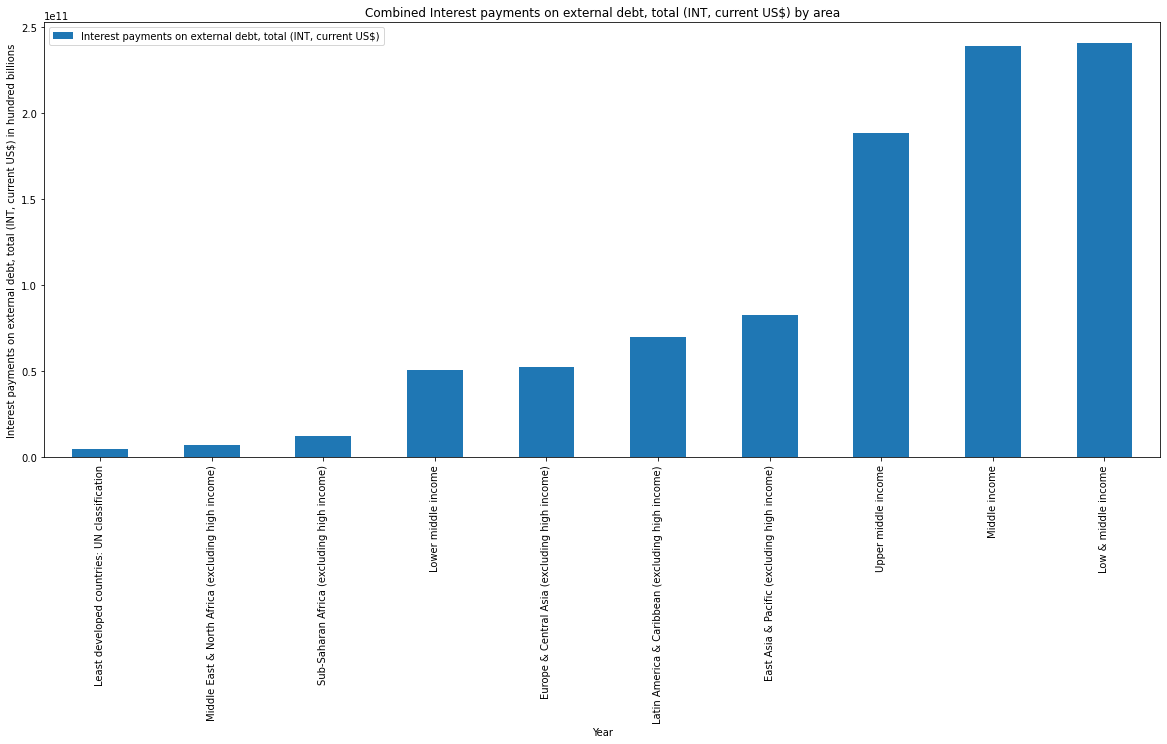

In [224]:
areas_2017.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest payments on external debt, total (INT, current US$) in hundred billions")
plt.title("Combined Interest payments on external debt, total (INT, current US$) by area")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

In [225]:
balance =debt.loc[(debt["Indicator Name"]=="Current account balance (current US$)")]
balance.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 60
28,Afghanistan,AFG,Current account balance (current US$),BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.683106e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,Albania,ALB,Current account balance (current US$),BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.814983e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,Algeria,DZA,Current account balance (current US$),BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.205871e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,Angola,AGO,Current account balance (current US$),BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.328672e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,Armenia,ARM,Current account balance (current US$),BN.CAB.XOKA.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.796738e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:

balance_df= pd.melt(balance, id_vars=["Country Name", "Country Code","Indicator Code", "Indicator Name"],  var_name="Year", value_name='Current account balance (current US$)')

balance_df.head()

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Current account balance (current US$)
0,Afghanistan,AFG,BN.CAB.XOKA.CD,Current account balance (current US$),1970,NaN
1,Albania,ALB,BN.CAB.XOKA.CD,Current account balance (current US$),1970,NaN
2,Algeria,DZA,BN.CAB.XOKA.CD,Current account balance (current US$),1970,NaN
3,Angola,AGO,BN.CAB.XOKA.CD,Current account balance (current US$),1970,NaN
4,Armenia,ARM,BN.CAB.XOKA.CD,Current account balance (current US$),1970,NaN


In [231]:
balance_df=balance_df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])


In [232]:
balance_df= balance_df.dropna()
balance_df.tail()

,Country Name,Year,Current account balance (current US$)
6425,Uzbekistan,2017,5.841000e+08
6426,Vanuatu,2017,-7.824000e+07
6428,Vietnam,2017,6.124000e+09
6430,Zambia,2017,-1.006368e+09
6431,Zimbabwe,2017,-3.078109e+08


In [233]:
balance_df["Current account balance (current US$)"].max()

449689995826.825

In [234]:
balance_df.loc[(balance_df["Current account balance (current US$)"]==449689995826.825)]

,Country Name,Year,Current account balance (current US$)
5218,Upper middle income,2008,4.496900e+11


In [235]:
balance_df["Current account balance (current US$)"].min()

-200572559941.489

In [236]:
balance_df.loc[(balance_df["Current account balance (current US$)"]==-200572559941.489)]

,Country Name,Year,Current account balance (current US$)
5831,Low & middle income,2013,-2.005726e+11


In [240]:
balance_2017= balance_df.loc[(balance_df["Year"]=="2017")]
balance_2017.head()

,Country Name,Year,Current account balance (current US$)
6298,Afghanistan,2017,-4.683106e+09
6299,Albania,2017,-9.814983e+08
6300,Algeria,2017,-2.205871e+10
6301,Angola,2017,-6.328672e+08
6302,Armenia,2017,-2.796738e+08


In [241]:

balance_2017_sorted= balance_2017.sort_values("Current account balance (current US$)")
balance_2017_sorted.head()

,Country Name,Year,Current account balance (current US$)
6369,Lower middle income,2017,-1.116134e+11
6406,South Asia,2017,-6.957512e+10
6351,IDA only,2017,-5.326796e+10
6363,Least developed countries: UN classification,2017,-4.904497e+10
6420,Turkey,2017,-4.747800e+10


In [242]:
balance_2017_sorted=balance_2017_sorted.drop(columns="Year")

In [245]:
balance_2017_sorted=balance_2017_sorted.set_index("Country Name")


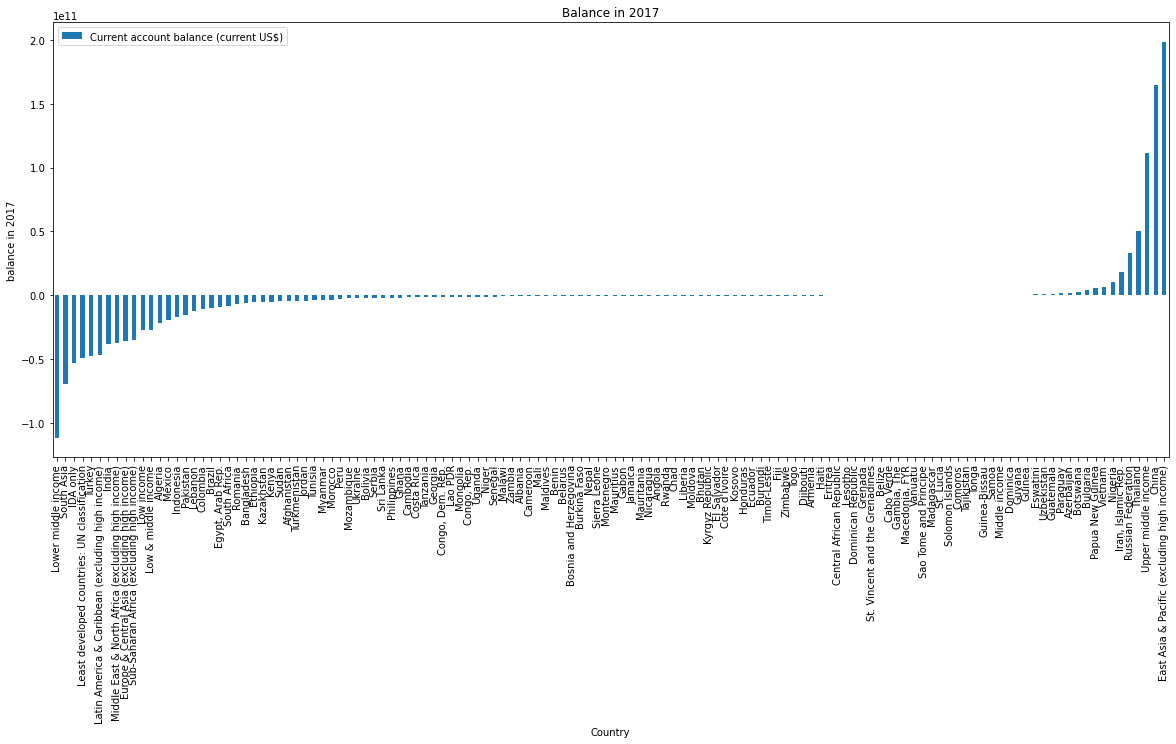

In [247]:
balance_2017_sorted.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("balance in 2017")
plt.title("Balance in 2017")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

Input a countryHaiti


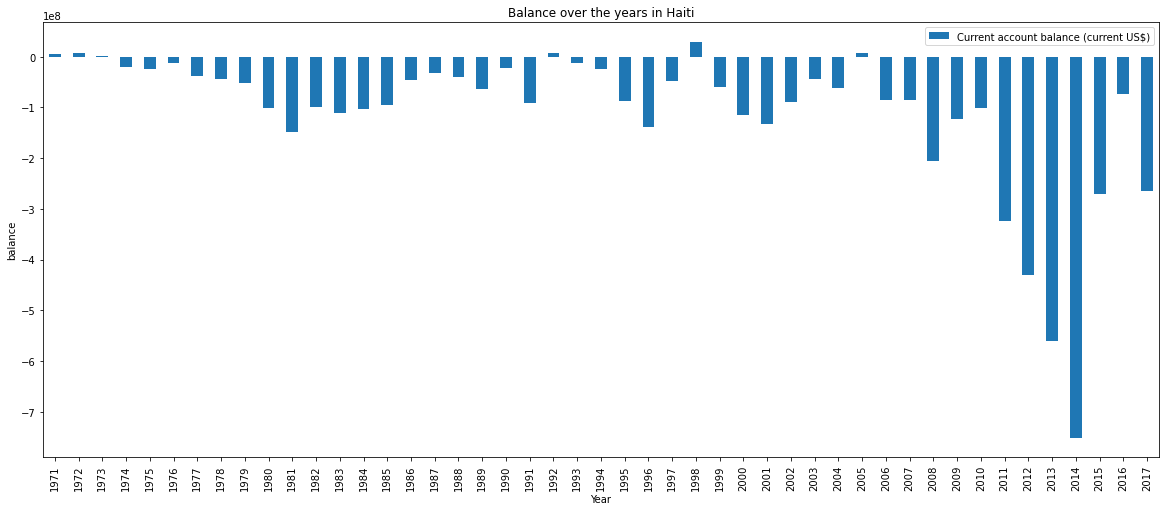

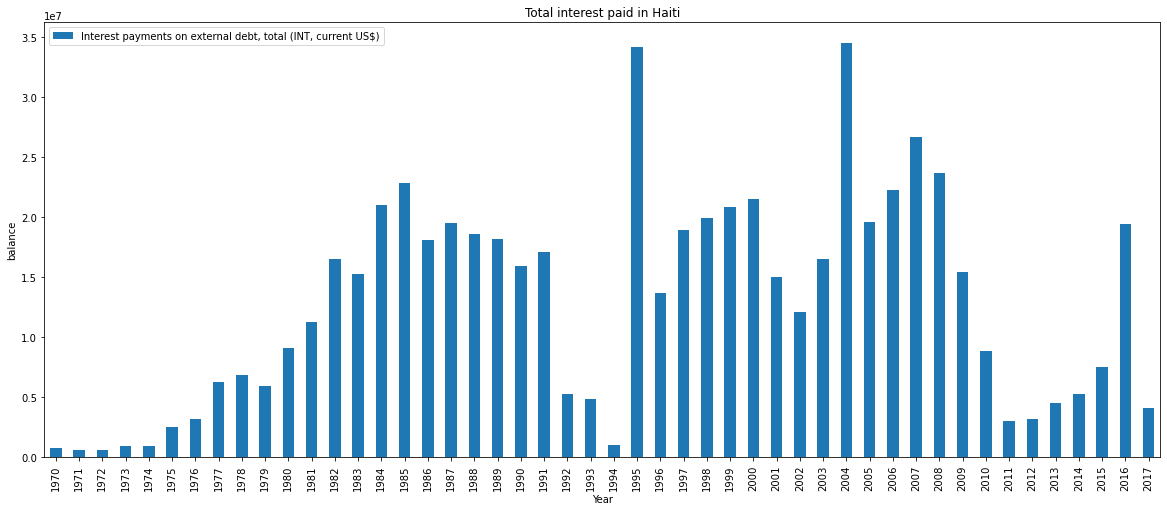

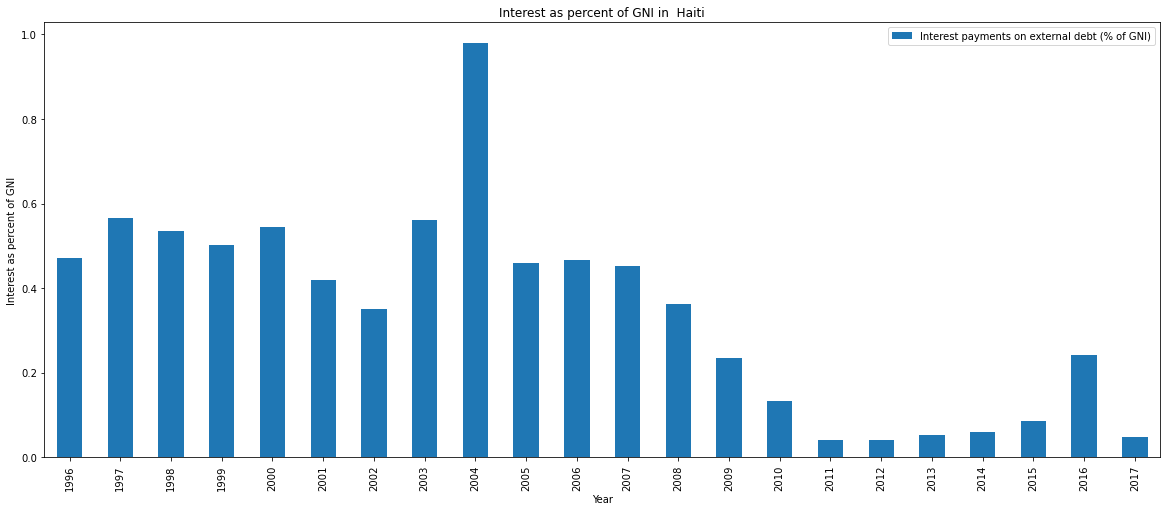

In [263]:
a= input("Input a country")
country_df= balance_df.loc[(balance_df["Country Name"]==a)]
country_df= country_df.drop(columns= "Country Name")
country_df= country_df.set_index("Year")
country_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("balance")
plt.title("Balance over the years in " +str(a))
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 


country_interest_df= interest_total_clean.loc[(interest_total_clean["Country Name"]==a)]
country_interest_df= country_interest_df.drop(columns= "Country Name")
country_interest_df= country_interest_df.set_index("Year")
country_interest_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("balance")
plt.title("Total interest paid in " +str(a))
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

country_interest__GNI_df= interest_clean.loc[(interest_clean["Country Name"]==a)]
country_interest__GNI_df= country_interest__GNI_df.drop(columns= "Country Name")
country_interest__GNI_df= country_interest__GNI_df.set_index("Year")
country_interest__GNI_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest as percent of GNI")
plt.title("Interest as percent of GNI in  " +str(a))
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

Input a countryHaiti


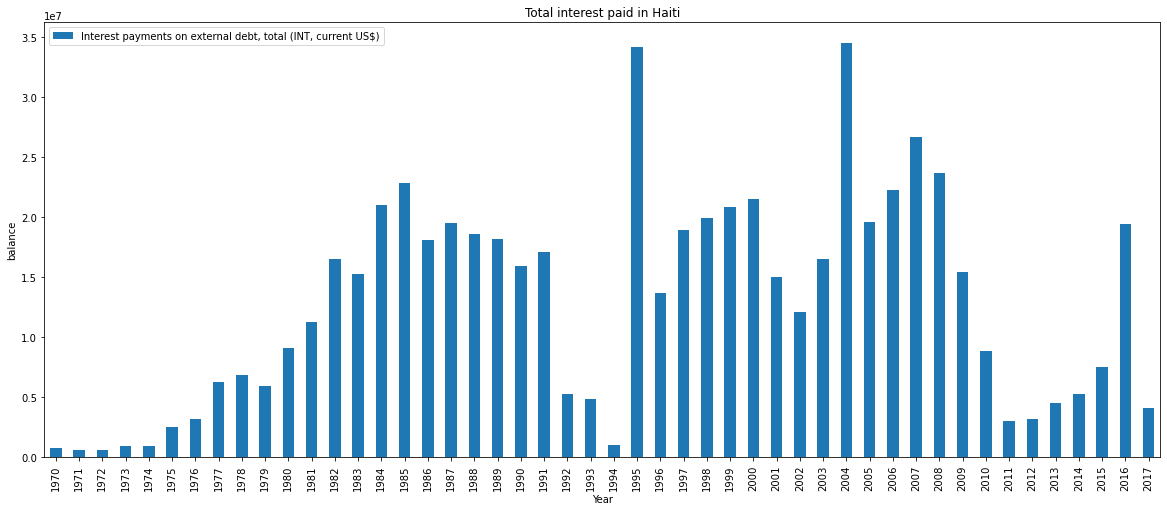

In [261]:
a= input("Input a country")
country_interest_df= interest_total_clean.loc[(interest_total_clean["Country Name"]==a)]
country_interest_df= country_interest_df.drop(columns= "Country Name")
country_interest_df= country_interest_df.set_index("Year")
country_interest_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("balance")
plt.title("Total interest paid in " +str(a))
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

Input a countryHaiti


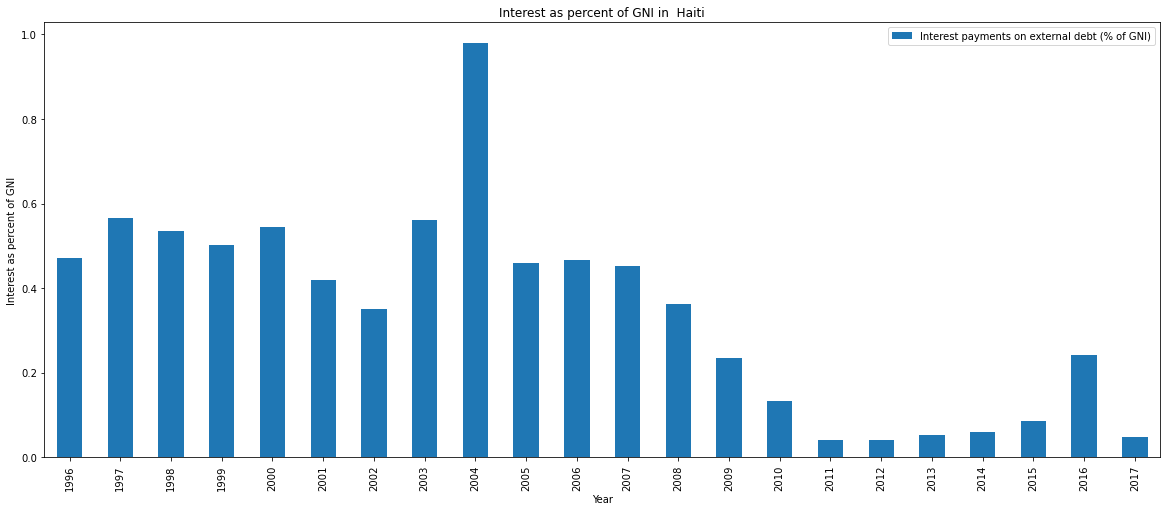

In [262]:
a= input("Input a country")
country_interest__GNI_df= interest_clean.loc[(interest_clean["Country Name"]==a)]
country_interest__GNI_df= country_interest__GNI_df.drop(columns= "Country Name")
country_interest__GNI_df= country_interest__GNI_df.set_index("Year")
country_interest__GNI_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Interest as percent of GNI")
plt.title("Interest as percent of GNI in  " +str(a))
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

## Part 3: Principal forgiven


In [265]:
forgiven = debt.loc[(debt["Indicator Name"]=="Principal forgiven (current US$)")]
forgiven.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 60
193,Afghanistan,AFG,Principal forgiven (current US$),DT.AXF.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,4291000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,Albania,ALB,Principal forgiven (current US$),DT.AXF.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,Algeria,DZA,Principal forgiven (current US$),DT.AXF.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,Angola,AGO,Principal forgiven (current US$),DT.AXF.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049,Armenia,ARM,Principal forgiven (current US$),DT.AXF.DPPG.CD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:

forgiven_df= pd.melt(forgiven, id_vars=["Country Name", "Country Code","Indicator Code", "Indicator Name"],  var_name="Year", value_name='Principal forgiven (current US$)')
forgiven_df.head()

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Principal forgiven (current US$)
0,Afghanistan,AFG,DT.AXF.DPPG.CD,Principal forgiven (current US$),1970,0.0
1,Albania,ALB,DT.AXF.DPPG.CD,Principal forgiven (current US$),1970,0.0
2,Algeria,DZA,DT.AXF.DPPG.CD,Principal forgiven (current US$),1970,0.0
3,Angola,AGO,DT.AXF.DPPG.CD,Principal forgiven (current US$),1970,0.0
4,Armenia,ARM,DT.AXF.DPPG.CD,Principal forgiven (current US$),1970,0.0


In [267]:
forgiven_df["Principal forgiven (current US$)"].max()

20581830768.6

In [268]:
forgiven_df.loc[(forgiven_df["Principal forgiven (current US$)"]==20581830768.6)]

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Principal forgiven (current US$)
4759,Low & middle income,LMY,DT.AXF.DPPG.CD,Principal forgiven (current US$),2005,2.058183e+10


In [269]:
forgiven_2017 = forgiven_df.loc[(forgiven_df["Year"]=="2017")]
forgiven_2017.head()

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Principal forgiven (current US$)
6298,Afghanistan,AFG,DT.AXF.DPPG.CD,Principal forgiven (current US$),2017,4291000.0
6299,Albania,ALB,DT.AXF.DPPG.CD,Principal forgiven (current US$),2017,600000.0
6300,Algeria,DZA,DT.AXF.DPPG.CD,Principal forgiven (current US$),2017,0.0
6301,Angola,AGO,DT.AXF.DPPG.CD,Principal forgiven (current US$),2017,0.0
6302,Armenia,ARM,DT.AXF.DPPG.CD,Principal forgiven (current US$),2017,0.0


In [ ]:
forgiven_2017= forgiven_2017.drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Year"])
forgiven_2017=forgiven_2017.set_index("Country Name")

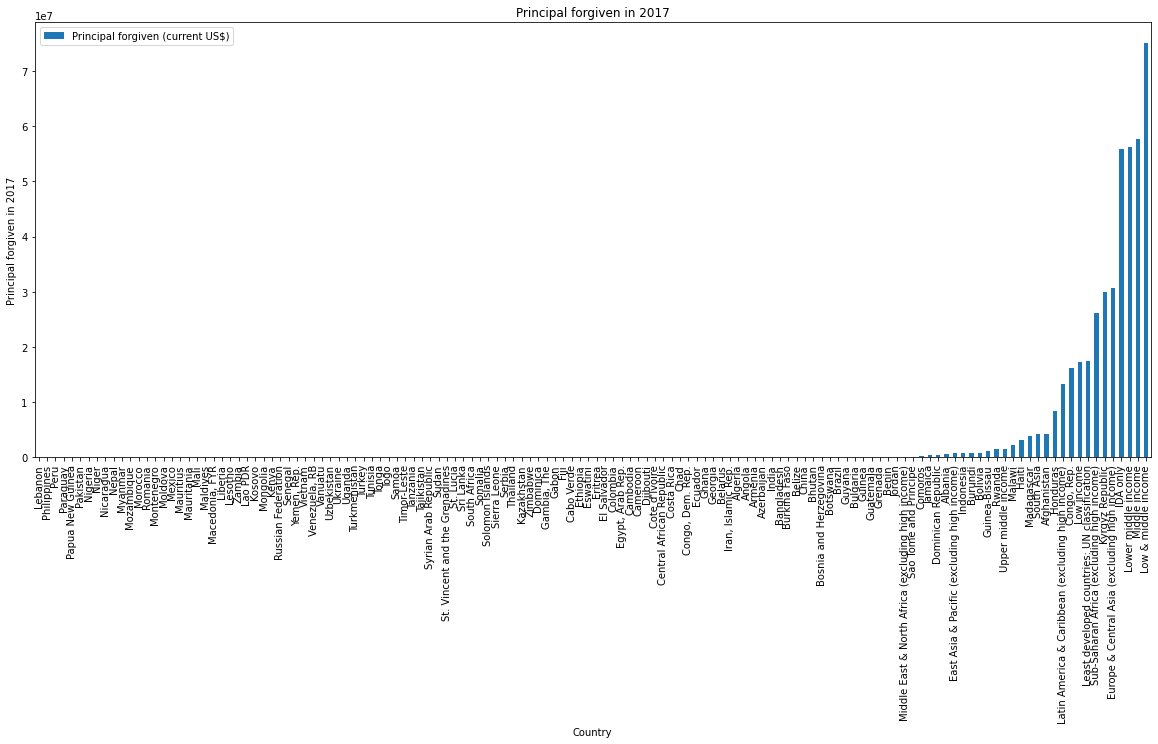

In [272]:

forgiven_2017=forgiven_2017.sort_values("Principal forgiven (current US$)")
forgiven_2017.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Principal forgiven in 2017")
plt.title("Principal forgiven in 2017")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

input a country Bolivia


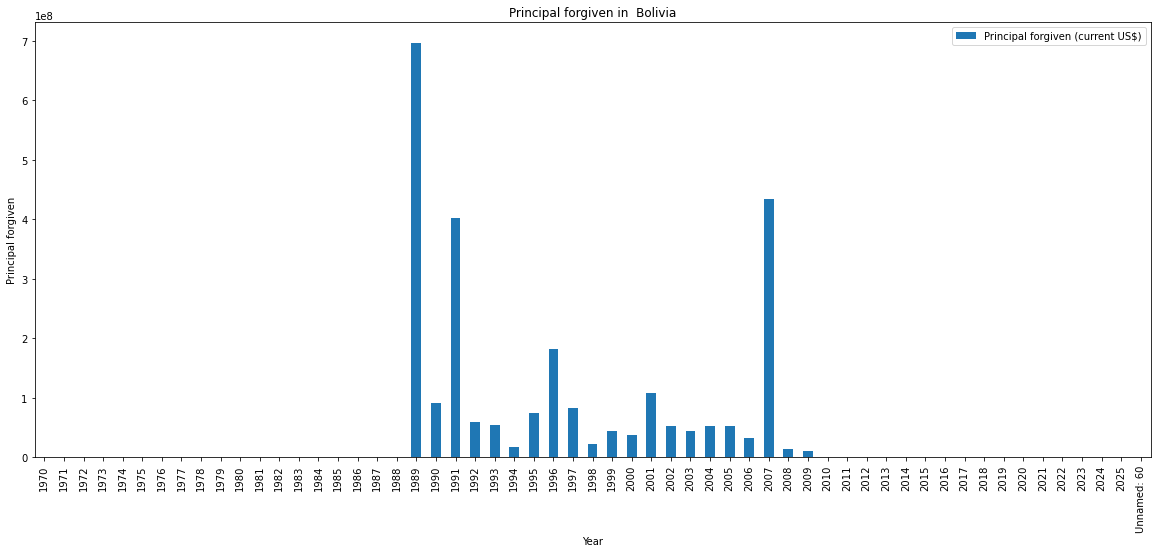

In [283]:
a= input("input a country ")
forgiven_country= forgiven_df.loc[(forgiven_df["Country Name"]==a)]
forgiven_country=forgiven_country.drop(columns= "Country Name")
forgiven_country= forgiven_country.set_index("Year")
forgiven_country.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Principal forgiven")
plt.title("Principal forgiven in  " +str(a))
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

## Part 4: Grace periods


In [284]:
grace= debt.loc[(debt["Indicator Name"]=="Average grace period on new external debt commitments (years)")]
grace.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 60
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,19.8318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Albania,ALB,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.5503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,Algeria,DZA,Average grace period on new external debt comm...,DT.GPA.DPPG,3.5975,5.6583,3.5625,6.0919,4.2026,3.5273,...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,Angola,AGO,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.5395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,Armenia,ARM,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,4.8830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:

grace_df= pd.melt(grace, id_vars=["Country Name", "Country Code","Indicator Code", "Indicator Name"],  var_name="Year", value_name='Average grace period on new external debt commitments (years)')
grace_df.head()

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Average grace period on new external debt commitments (years)
0,Afghanistan,AFG,DT.GPA.DPPG,Average grace period on new external debt comm...,1970,0.0000
1,Albania,ALB,DT.GPA.DPPG,Average grace period on new external debt comm...,1970,0.0000
2,Algeria,DZA,DT.GPA.DPPG,Average grace period on new external debt comm...,1970,3.5975
3,Angola,AGO,DT.GPA.DPPG,Average grace period on new external debt comm...,1970,0.0000
4,Armenia,ARM,DT.GPA.DPPG,Average grace period on new external debt comm...,1970,0.0000


In [294]:
grace_df=grace_df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
grace_df2=grace_df.set_index("Country Name")
grace_df2.head()

,Year,Average grace period on new external debt commitments (years)
Country Name,,
Afghanistan,1970,0.0000
Albania,1970,0.0000
Algeria,1970,3.5975
Angola,1970,0.0000
Armenia,1970,0.0000


In [287]:
grace_df["Average grace period on new external debt commitments (years)"].mean()

5.509158365044938

In [288]:
grace_df["Average grace period on new external debt commitments (years)"].max()

30.4999

In [295]:
grace_df_mean= grace_df.drop(columns= "Country Name")
grace_df_mean=grace_df_mean.groupby(by="Year")["Average grace period on new external debt commitments (years)"].mean()
grace_df_mean.head()

Year
1970    4.322369
1971    3.781212
1972    4.213486
1973    4.215470
1974    4.600582
Name: Average grace period on new external debt commitments (years), dtype: float64

Text(0, 0.5, 'Number of years')

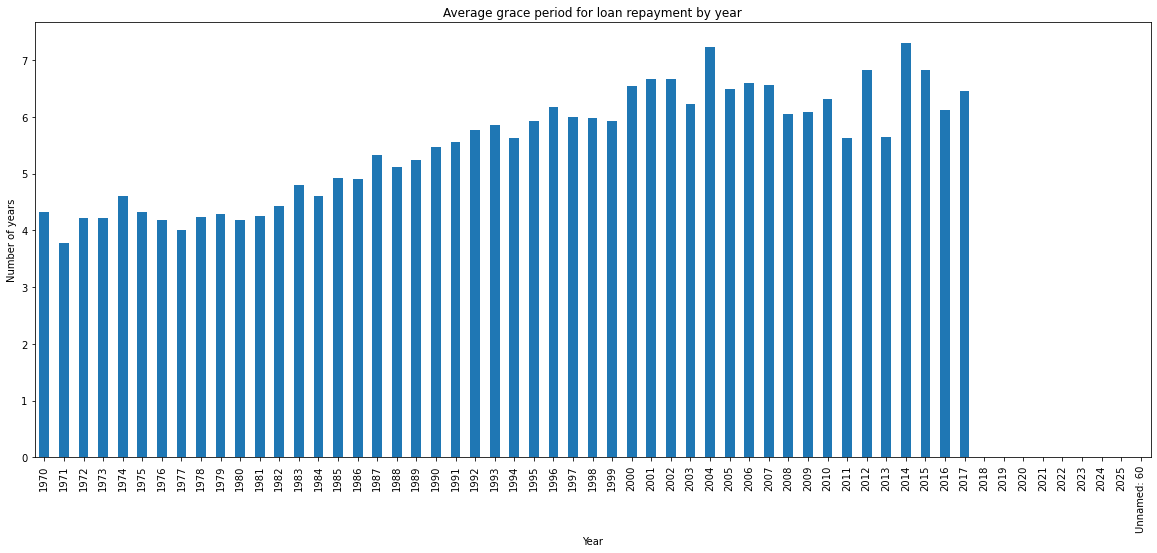

In [297]:
grace_df_mean.plot(kind= "bar")
plt.title("Average grace period for loan repayment by year")
plt.xlabel("Year")
plt.ylabel("Number of years")

## Part 5: Interest rates

In [298]:
average_interest= debt.loc[(debt["Indicator Name"]=="Average interest on new external debt commitments (%)")]
average_interest.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 60
6,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.DPPG,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.5707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Albania,ALB,Average interest on new external debt commitme...,DT.INR.DPPG,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.6625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,Algeria,DZA,Average interest on new external debt commitme...,DT.INR.DPPG,5.6541,5.5127,6.0445,8.8595,6.7695,7.6079,...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,Angola,AGO,Average interest on new external debt commitme...,DT.INR.DPPG,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,5.3942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,Armenia,ARM,Average interest on new external debt commitme...,DT.INR.DPPG,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,2.2210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:

average_interest_df= pd.melt(average_interest, id_vars=["Country Name", "Country Code","Indicator Code", "Indicator Name"],  var_name="Year", value_name="interest_rate")
average_interest_df.head()


,Country Name,Country Code,Indicator Code,Indicator Name,Year,interest_rate
0,Afghanistan,AFG,DT.INR.DPPG,Average interest on new external debt commitme...,1970,0.0000
1,Albania,ALB,DT.INR.DPPG,Average interest on new external debt commitme...,1970,0.0000
2,Algeria,DZA,DT.INR.DPPG,Average interest on new external debt commitme...,1970,5.6541
3,Angola,AGO,DT.INR.DPPG,Average interest on new external debt commitme...,1970,0.0000
4,Armenia,ARM,DT.INR.DPPG,Average interest on new external debt commitme...,1970,0.0000


In [307]:
average_interest_df=average_interest_df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
average_interest_df2=average_interest_df.set_index("Country Name")
average_interest_df2.head()

,Year,interest_rate
Country Name,,
Afghanistan,1970,0.0000
Albania,1970,0.0000
Algeria,1970,5.6541
Angola,1970,0.0000
Armenia,1970,0.0000


In [308]:
average_interest_df2["interest_rate"].max()

16.624

In [309]:
average_interest_df2.loc[(average_interest_df2["interest_rate"]==16.624)]

,Year,interest_rate
Country Name,,
Bulgaria,1981,16.624


In [310]:
average_interest_df["interest_rate"].mean()

3.2112333725997155

input a country Bulgaria


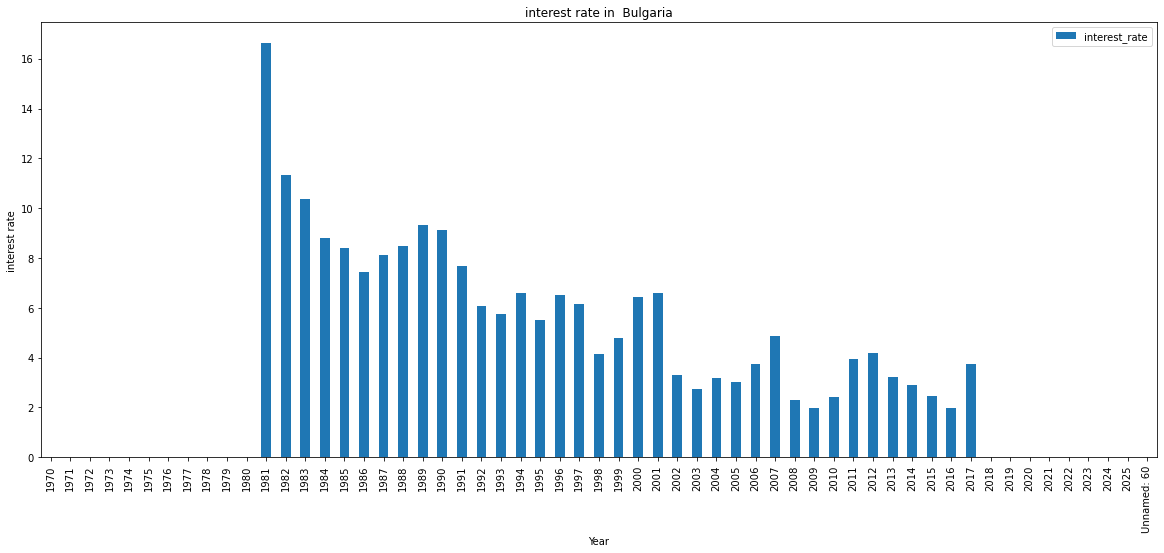

In [317]:
a= input("input a country ")
interest_rate_country= average_interest_df.loc[(average_interest_df["Country Name"]==a)]
interest_rate_country=interest_rate_country.drop(columns= "Country Name")
interest_rate_country= interest_rate_country.set_index("Year")
interest_rate_country.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("interest rate")
plt.title("interest rate in  " +str(a))
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,8)
plt.show() 

In [318]:
average_interest_df2.loc[(average_interest_df2["Year"]=="1981")].interest_rate.mean()

5.40300778081539

In [321]:
average_interest_df2_mean= average_interest_df2
average_interest_df2_mean=average_interest_df2_mean.groupby(by="Year")["interest_rate"].mean()
average_interest_df2_mean.head()

Year
1970    2.696178
1971    2.779417
1972    2.635437
1973    3.017796
1974    3.163724
Name: interest_rate, dtype: float64

Text(0, 0.5, 'interest rate')

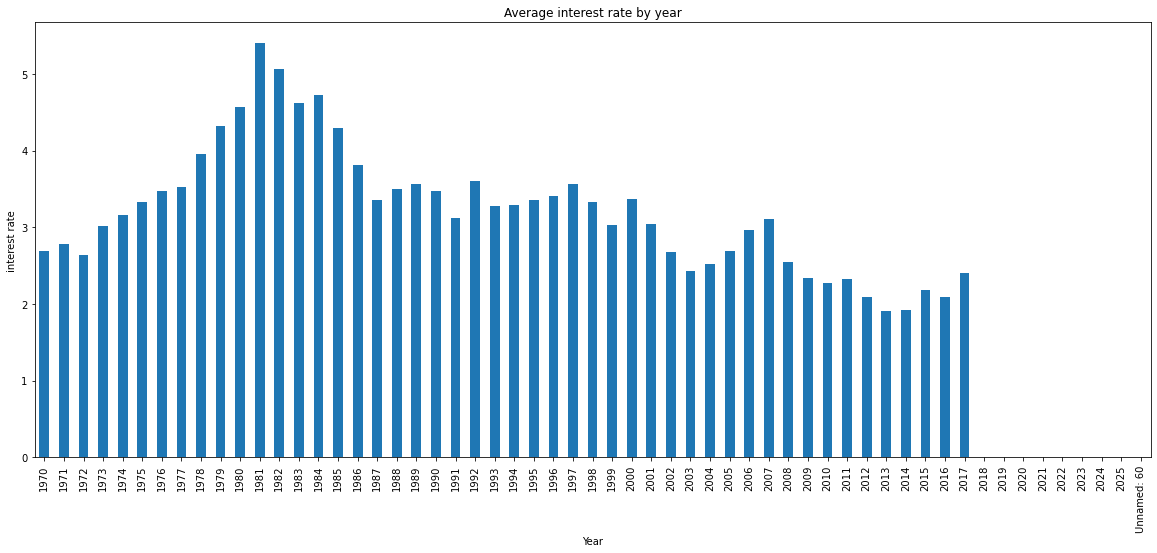

In [322]:
average_interest_df2_mean.plot(kind= "bar")
plt.title("Average interest rate by year")
plt.xlabel("Year")
plt.ylabel("interest rate")

In [324]:
interest_1981= average_interest_df2.loc[(average_interest_df2["Year"]=="1981")]
interest_1981.head()

,Year,interest_rate
Country Name,,
Afghanistan,1981,0.0000
Albania,1981,0.0000
Algeria,1981,8.2964
Angola,1981,0.0000
Armenia,1981,0.0000


In [325]:
interest_1981= interest_1981.drop(columns="Year")

Text(0.5, 1.0, 'Interest rates by country in 1981')

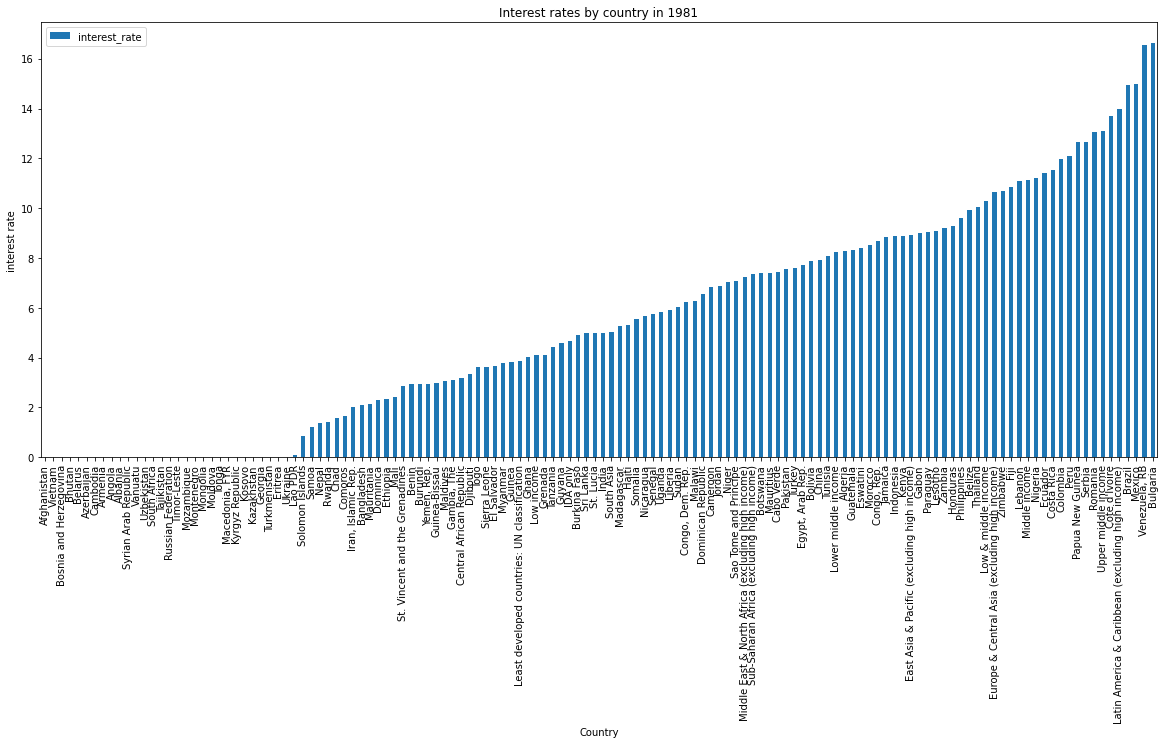

In [327]:
interest_1981= interest_1981.sort_values("interest_rate")
interest_1981.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("interest rate")
plt.title("Interest rates by country in 1981")

In [331]:
interest_1981.reset_index(inplace=True, drop=False)
interest_1981.loc[(interest_1981["Country Name"]=="Europe & Central Asia (excluding high income)")]


,index,Country Name,interest_rate
114,114,Europe & Central Asia (excluding high income),10.644899


In [332]:
interest_1981["interest_rate"].mean()

5.40300778081539

In [335]:
average_interest_df2.reset_index(drop=False, inplace=True)
average_interest_df2.loc[(average_interest_df2["Year"]=="1990") & (average_interest_df2["Country Name"]=="Europe & Central Asia (excluding high income)")]


,Country Name,Year,interest_rate
2720,Europe & Central Asia (excluding high income),1990,8.364966


In [336]:
Europe= average_interest_df2.loc[(average_interest_df2["Country Name"]=="Europe & Central Asia (excluding high income)")]
Europe.head()


,Country Name,Year,interest_rate
40,Europe & Central Asia (excluding high income),1970,4.178514
174,Europe & Central Asia (excluding high income),1971,5.489812
308,Europe & Central Asia (excluding high income),1972,5.327968
442,Europe & Central Asia (excluding high income),1973,3.918539
576,Europe & Central Asia (excluding high income),1974,6.564295


In [337]:
Europe_to_graph = Europe.drop(columns="Country Name")
Europe_to_graph=Europe_to_graph.set_index("Year")


Text(0.5, 1.0, 'interest rates in Europe and West Asia (exclding high income countries)')

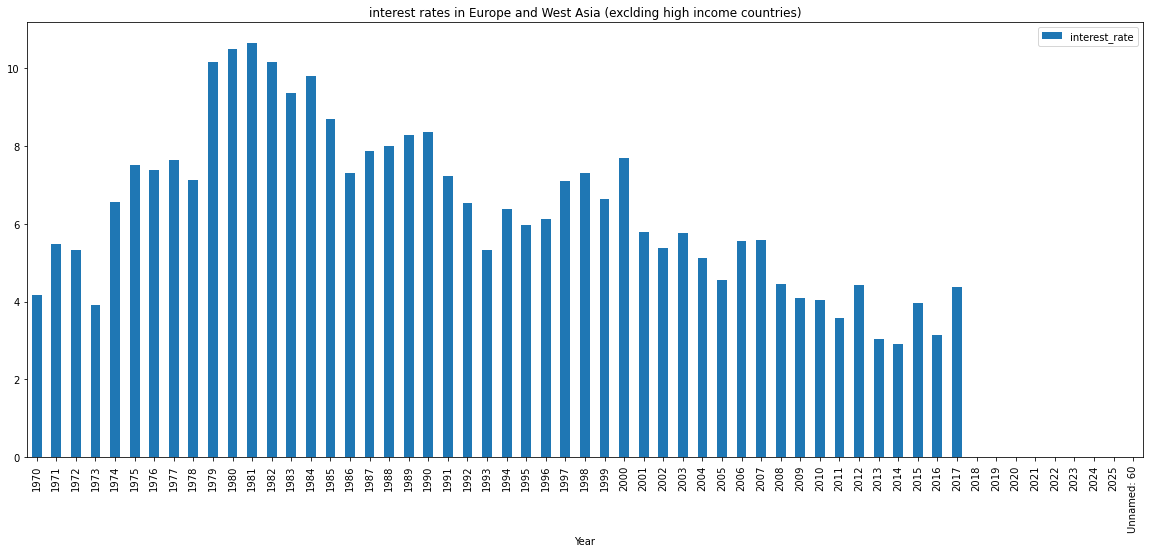

In [338]:
Europe_to_graph.plot(kind="bar")
plt.title("interest rates in Europe and West Asia (exclding high income countries)")

In [341]:
Latin_America= average_interest_df2.loc[(average_interest_df2["Country Name"]=="Latin America & Caribbean (excluding high income)")]

Latin_America.head()

,Country Name,Year,interest_rate
64,Latin America & Caribbean (excluding high income),1970,6.657112
198,Latin America & Caribbean (excluding high income),1971,6.779304
332,Latin America & Caribbean (excluding high income),1972,6.530816
466,Latin America & Caribbean (excluding high income),1973,7.971825
600,Latin America & Caribbean (excluding high income),1974,8.543021


In [342]:
LA_to_graph = Latin_America.drop(columns="Country Name")
LA_to_graph=LA_to_graph.set_index("Year")


Text(0.5, 1.0, 'interest rates in Latin America & Caribbean (exclding high income countries)')

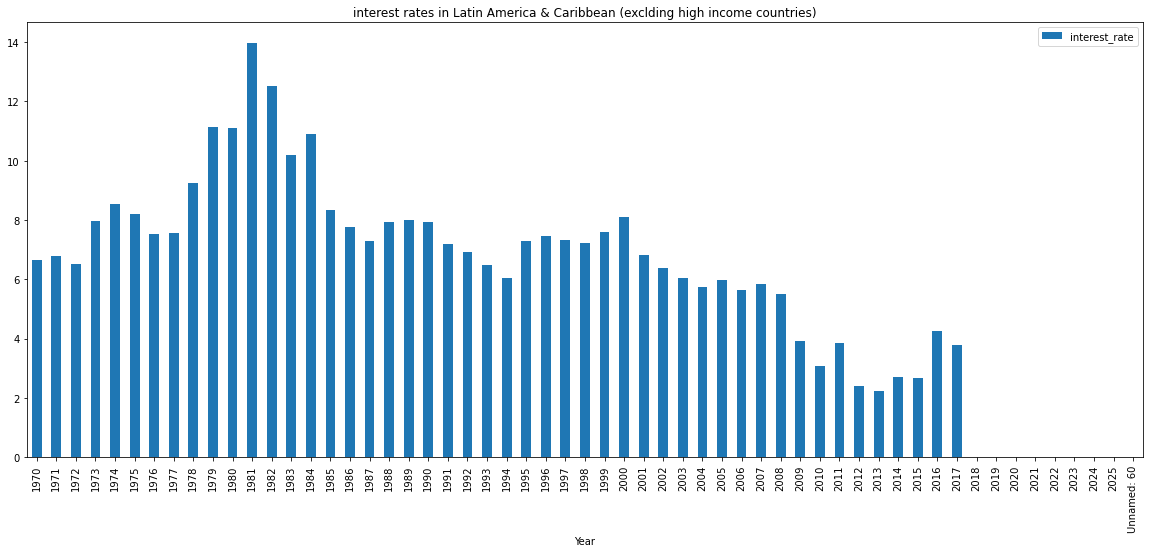

In [343]:
LA_to_graph.plot(kind="bar")
plt.title("interest rates in Latin America & Caribbean (exclding high income countries)")